### Import Libraries

In [1]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model

from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import pip
import missingno as msno
from collections import Counter


In [3]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.preprocessing import MinMaxScaler



# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


##### Read Data

In [4]:
df=pd.read_csv("C:\\Users\\maryam\\Downloads\\Carlo Lisi\\RisklabDataCompetition\\data for participants.csv")

## Feature Analysis

In [5]:
df.head(5)

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,9600.0,1.0,3.0,3.0,32.0,6.0,110.0,138.0,5.0,2847.0,...,7.0,331.0,1080.0,12.0,535.0,1671.0,3.0,4800.0,6799.0,1.0
1,14400.0,2.0,3.0,2.0,30.0,-2.0,0.0,132.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,45.0,0.0,-2.0,136.0,45.0,0.0
2,8100.0,1.0,1.0,2.0,29.0,-1.0,133.0,7.0,-1.0,1700.0,...,-1.0,751.0,-4.0,-1.0,498.0,747.0,-1.0,381.0,496.0,0.0
3,2700.0,2.0,2.0,1.0,31.0,0.0,104.0,2891.0,0.0,140.0,...,0.0,40.0,2842.0,0.0,60.0,1187.0,0.0,19.0,1153.0,0.0
4,14500.0,2.0,2.0,1.0,37.0,-2.0,309.0,403.0,-2.0,94.0,...,-2.0,362.0,381.0,-2.0,0.0,362.0,-2.0,116.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30602 entries, 0 to 30601
Data columns (total 24 columns):
Credit_Limit                  30602 non-null float64
Sex                           30601 non-null float64
Education                     30599 non-null float64
Marital_Status                30598 non-null float64
Age                           30595 non-null float64
Jan_Repay_Status              30597 non-null float64
Previous_Payment_Prior_Jan    30599 non-null float64
Jan_Statement                 30595 non-null float64
Feb_Repay_Status              30600 non-null float64
Previous_Payment_Prior_Feb    30597 non-null float64
Feb_Statement                 30595 non-null float64
Mar_Repay_Status              30599 non-null float64
Previous_Payment_Prior_Mar    30600 non-null float64
Mar_Statement                 30598 non-null float64
Apr_Repay_Status              30598 non-null float64
Previous_Payment_Prior_Apr    30599 non-null float64
Apr_Statement                 30599 non-nul

In [7]:
df.describe()

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
count,30602.000000,30601.000000,30599.000000,30598.000000,30595.000000,30597.000000,30599.000000,30595.000000,30600.000000,30597.000000,...,30598.000000,30599.000000,30599.000000,30601.000000,30598.000000,30599.000000,30600.000000,30600.000000,30597.000000,30601.000000
mean,6672.102712,1.600667,1.872349,1.560625,35.835921,0.069615,243.085297,2058.031084,-0.043595,252.887473,...,-0.123636,209.955619,1741.370045,-0.173393,208.100431,1626.891434,-0.197680,227.101667,1573.701213,0.225189
std,5165.664158,0.510355,0.816311,0.533208,10.142700,1.396863,697.377685,2936.812290,1.466934,941.932594,...,1.470158,662.602886,2566.962601,1.430435,643.601986,2430.148971,1.449626,745.095203,2385.559628,0.417948
min,200.000000,0.000000,0.000000,0.000000,14.000000,-2.000000,0.000000,-6623.000000,-2.000000,0.000000,...,-2.000000,0.000000,-6800.000000,-2.000000,0.000000,-3253.000000,-2.000000,0.000000,-13584.000000,0.000000
25%,2100.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,40.000000,147.000000,-1.000000,36.000000,...,-1.000000,12.000000,97.000000,-1.000000,12.000000,75.000000,-1.000000,7.000000,53.000000,0.000000
50%,5600.000000,2.000000,2.000000,2.000000,34.000000,0.000000,87.000000,914.000000,0.000000,82.000000,...,0.000000,61.000000,770.000000,0.000000,62.000000,734.000000,0.000000,60.000000,694.000000,0.000000
75%,9500.000000,2.000000,2.000000,2.000000,42.000000,0.000000,205.000000,2712.000000,0.000000,200.000000,...,0.000000,171.000000,2212.000000,0.000000,170.750000,2029.000000,0.000000,168.000000,1992.000000,0.000000
max,40100.000000,8.000000,6.000000,4.000000,102.000000,12.000000,34942.000000,38580.000000,12.000000,67370.000000,...,12.000000,24840.000000,35663.000000,12.000000,17061.000000,37087.000000,12.000000,21147.000000,38467.000000,2.000000


In [8]:
df.skew()

Credit_Limit                   1.000903
Sex                           -0.121720
Education                      1.032497
Marital_Status                 0.073694
Age                            1.213690
Jan_Repay_Status               2.618346
Previous_Payment_Prior_Jan    12.999641
Jan_Statement                  2.645478
Feb_Repay_Status               2.445304
Previous_Payment_Prior_Feb    28.212977
Feb_Statement                  2.685062
Mar_Repay_Status               2.540738
Previous_Payment_Prior_Mar    15.413924
Mar_Statement                  3.059001
Apr_Repay_Status               2.767552
Previous_Payment_Prior_Apr    11.468868
Apr_Statement                  2.798272
May_Repay_Status               2.880160
Previous_Payment_Prior_May     9.967769
May_Statement                  2.839645
Jun_Repay_Status               2.835747
Previous_Payment_Prior_Jun     9.578048
Jun_Statement                  2.798760
July_Payment_Status            1.319903
dtype: float64

#### Dealing with duplicates

In [9]:
df[df.duplicated()]

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
9607,14400.0,1.0,1.0,2.0,27.0,-2.0,0.0,0.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,0.0
12182,3200.0,2.0,2.0,1.0,32.0,-2.0,0.0,0.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,0.0
13670,4100.0,1.0,2.0,2.0,27.0,0.0,200.0,4018.0,0.0,320.0,...,0.0,140.0,3976.0,0.0,39.0,3824.0,-1.0,0.0,39.0,0.0
15789,1200.0,2.0,2.0,1.0,32.0,3.0,0.0,96.0,2.0,0.0,...,7.0,0.0,96.0,7.0,0.0,96.0,7.0,0.0,96.0,1.0
16053,2100.0,2.0,3.0,1.0,51.0,2.0,88.0,1935.0,0.0,84.0,...,0.0,0.0,2042.0,2.0,80.0,2006.0,0.0,80.0,1928.0,1.0
21408,14400.0,2.0,1.0,2.0,29.0,-1.0,181.0,71.0,-1.0,588.0,...,0.0,86.0,427.0,-1.0,51.0,79.0,-1.0,963.0,51.0,0.0
22211,20000.0,2.0,2.0,2.0,29.0,0.0,323.0,9398.0,0.0,296.0,...,0.0,154.0,5647.0,0.0,145.0,5214.0,0.0,137.0,5057.0,0.0
22246,1100.0,2.0,2.0,2.0,32.0,0.0,57.0,1179.0,0.0,63.0,...,0.0,32.0,1155.0,0.0,29.0,1171.0,0.0,73.0,920.0,1.0
24094,8100.0,2.0,1.0,1.0,32.0,1.0,0.0,0.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,0.0
26127,7900.0,2.0,1.0,1.0,36.0,1.0,0.0,0.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,0.0


In [10]:
df.drop_duplicates(keep = 'first', inplace = True)

#### Dealing with Missing Values

In [11]:
df.isnull().sum()

Credit_Limit                  0
Sex                           1
Education                     3
Marital_Status                4
Age                           7
Jan_Repay_Status              5
Previous_Payment_Prior_Jan    3
Jan_Statement                 7
Feb_Repay_Status              2
Previous_Payment_Prior_Feb    5
Feb_Statement                 7
Mar_Repay_Status              3
Previous_Payment_Prior_Mar    2
Mar_Statement                 4
Apr_Repay_Status              4
Previous_Payment_Prior_Apr    3
Apr_Statement                 3
May_Repay_Status              1
Previous_Payment_Prior_May    4
May_Statement                 3
Jun_Repay_Status              2
Previous_Payment_Prior_Jun    2
Jun_Statement                 5
July_Payment_Status           1
dtype: int64

,Total,Percent
Age,7,0.000229
Jan_Statement,7,0.000229
Feb_Statement,7,0.000229
Jan_Repay_Status,5,0.000163
Previous_Payment_Prior_Feb,5,0.000163


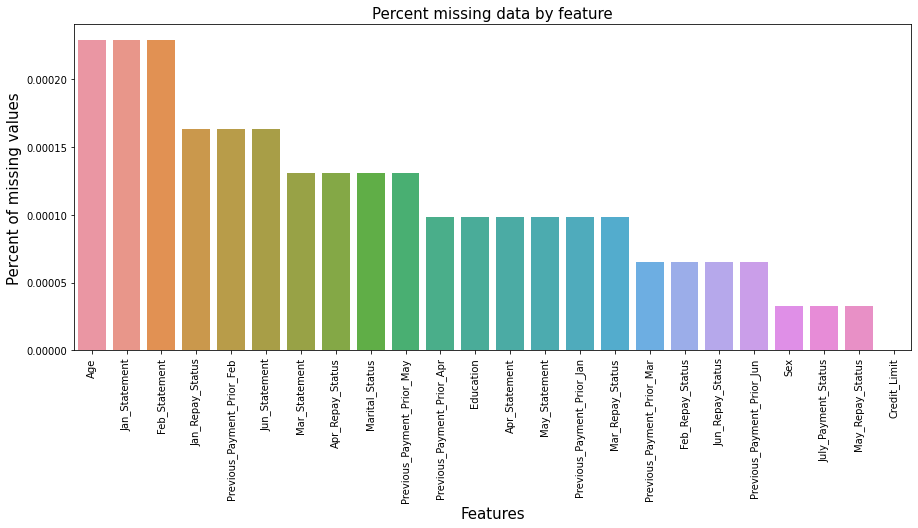

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

#### Filling NA

#### Using mode for fill NA in categorical variables

In [13]:
D=['Education','Sex','Marital_Status','Jan_Repay_Status','Feb_Repay_Status','Mar_Repay_Status',
 'Apr_Repay_Status','May_Repay_Status','Jun_Repay_Status','July_Payment_Status']

In [14]:
for d in D:
    df[d].fillna(df[d].mode()[0], inplace=True)

#### Using Mean for fill NA in numerical variables

In [15]:
G=['Previous_Payment_Prior_Jan', 'Previous_Payment_Prior_Feb', 'Previous_Payment_Prior_Mar','Previous_Payment_Prior_Apr'
  ,'Previous_Payment_Prior_May','Previous_Payment_Prior_Jun','Jan_Statement','Feb_Statement','Mar_Statement','Apr_Statement'
  ,'May_Statement','Jun_Statement','Age']

In [16]:
for g in G:
    df[g].fillna(df[g].mean(), inplace=True)

In [17]:
df.isna().sum()

Credit_Limit                  0
Sex                           0
Education                     0
Marital_Status                0
Age                           0
Jan_Repay_Status              0
Previous_Payment_Prior_Jan    0
Jan_Statement                 0
Feb_Repay_Status              0
Previous_Payment_Prior_Feb    0
Feb_Statement                 0
Mar_Repay_Status              0
Previous_Payment_Prior_Mar    0
Mar_Statement                 0
Apr_Repay_Status              0
Previous_Payment_Prior_Apr    0
Apr_Statement                 0
May_Repay_Status              0
Previous_Payment_Prior_May    0
May_Statement                 0
Jun_Repay_Status              0
Previous_Payment_Prior_Jun    0
Jun_Statement                 0
July_Payment_Status           0
dtype: int64

#### Removing rows with target equal 2

In [18]:
df['July_Payment_Status'].value_counts()

0.0    23702
1.0     6880
2.0        3
Name: July_Payment_Status, dtype: int64

In [19]:
df[df['July_Payment_Status']==2]

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
3356,1300.0,2.0,1.0,1.0,51.0,-1.0,58.0,97.0,9.0,134.0,...,12.0,379.000000,440.0,1.0,72.0,1627.154895,5.0,352.0,389.0,2.0
6446,8100.0,2.0,3.0,1.0,84.0,4.0,679.0,3131.0,10.0,214.0,...,3.0,210.048394,113.0,8.0,64.0,117.000000,3.0,1576.0,7240.0,2.0
26975,6600.0,2.0,4.0,1.0,70.0,0.0,3466.0,5299.0,7.0,322.0,...,12.0,983.000000,1274.0,6.0,1459.0,2321.000000,9.0,4828.0,5323.0,2.0


In [20]:
df=df.drop([26975,6446,3356],axis=0)

In [21]:
df['July_Payment_Status'].value_counts()

0.0    23702
1.0     6880
Name: July_Payment_Status, dtype: int64

## Visualizing

In [22]:
Paid = df[df['July_Payment_Status']==0]


In [23]:
Not_Paid = df[df['July_Payment_Status']==1]

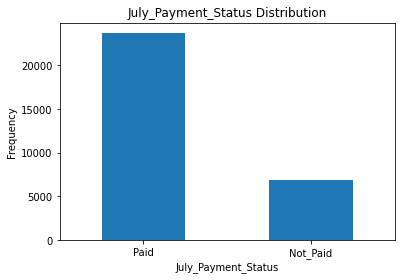

In [24]:
LABELS = ["Paid","Not_Paid"]

count_classes = pd.value_counts(df['July_Payment_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("July_Payment_Status Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("July_Payment_Status")
plt.ylabel("Frequency");

In [25]:
Paid.shape

(23702, 24)

In [26]:
b1=['Previous_Payment_Prior_Jan','Jan_Statement','July_Payment_Status']
b2=['Previous_Payment_Prior_Mar','Mar_Statement','July_Payment_Status']
b3=['Previous_Payment_Prior_Feb','Feb_Statement','July_Payment_Status']
b4=['Previous_Payment_Prior_May','May_Statement','July_Payment_Status']
b5=['Previous_Payment_Prior_Apr','Apr_Statement','July_Payment_Status']
b6=['Previous_Payment_Prior_Jun','Jun_Statement','July_Payment_Status']
b7=['Age','Credit_Limit','July_Payment_Status']

In [27]:
def s(p):
    a=df[p]
    b=(a - a.mean()) / (a.std()) 
    return b

In [28]:
def f(u):
    a=s(u)
    plt.figure(figsize=(10,10))
    return sns.violinplot(x="features", y="value", hue="July_Payment_Status", data=pd.melt(a,id_vars="July_Payment_Status",var_name="features", value_name='value'),split=True, inner="quart")

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


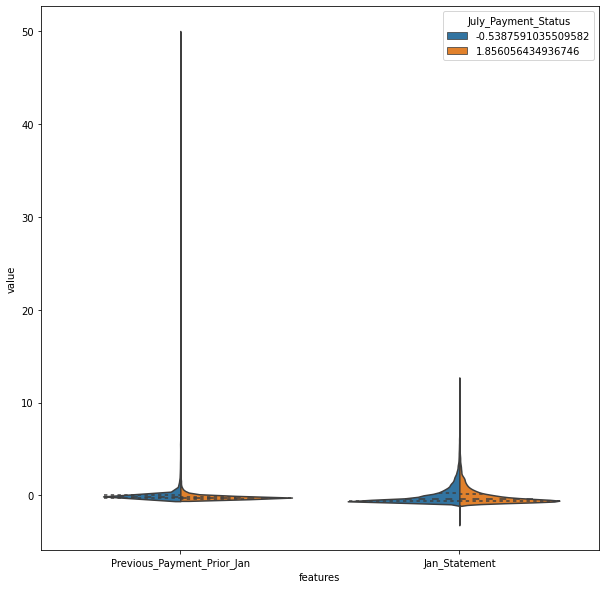

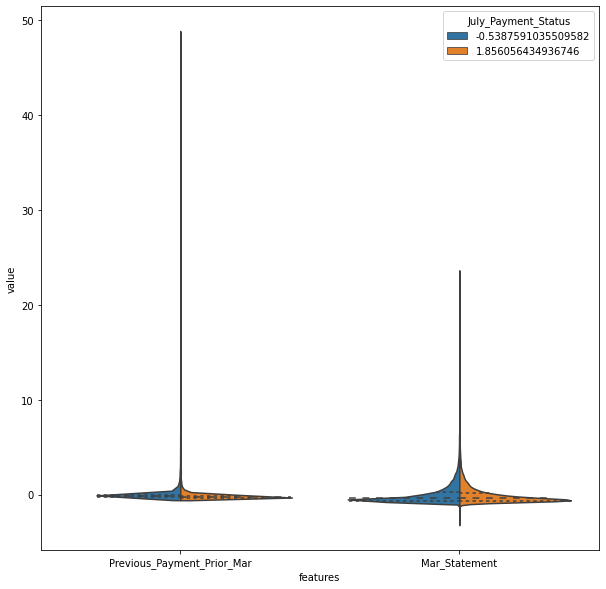

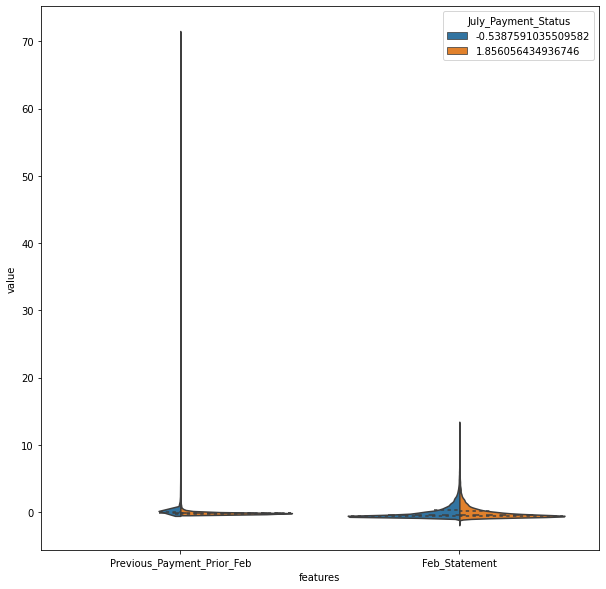

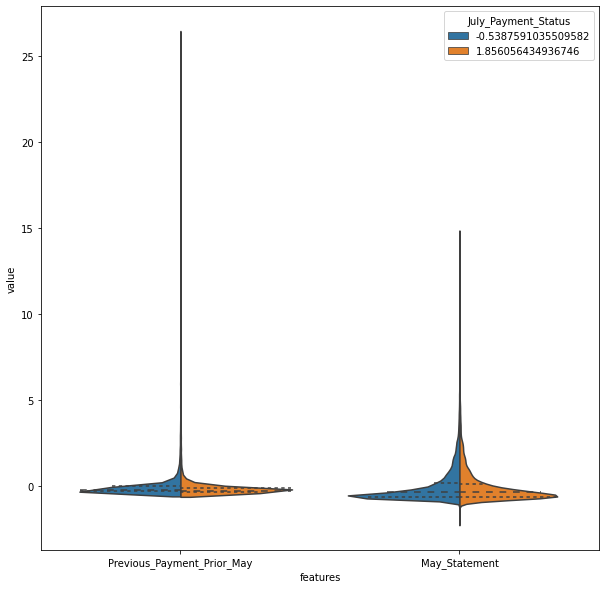

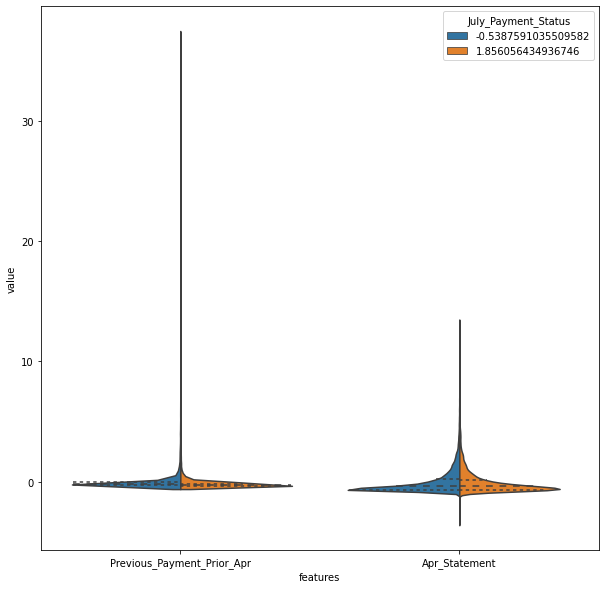

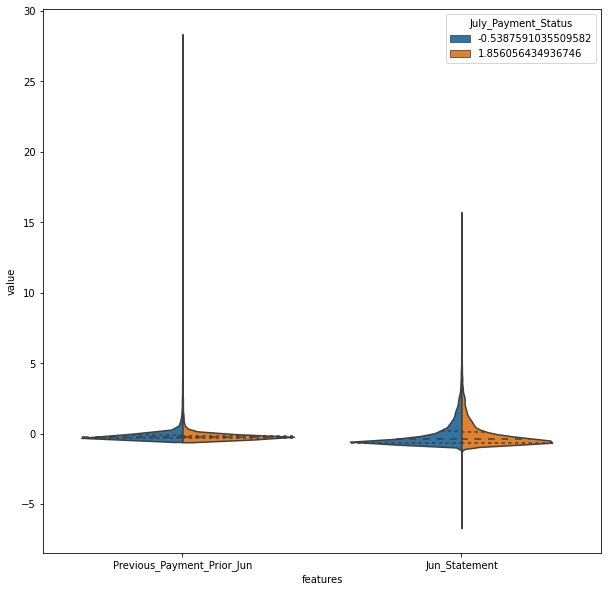

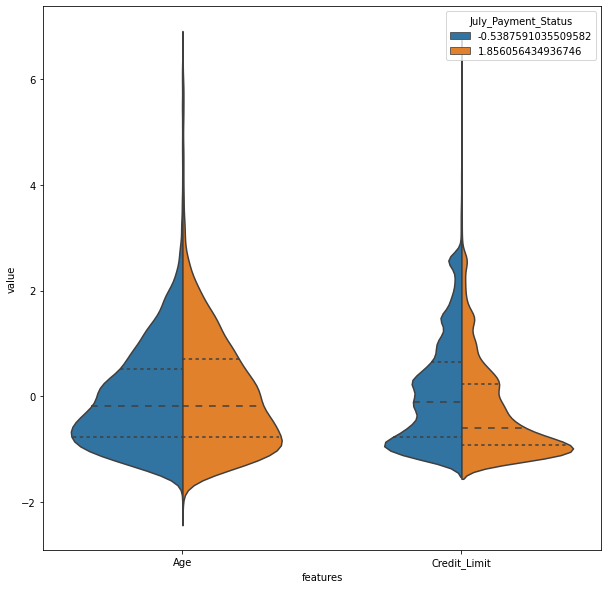

In [29]:
b=[b1,b2,b3,b4,b5,b6,b7]
for c in b:
    print(f(c))

In [30]:
def w(p):
    a=df[p] 
    a["July_Payment_Status"].replace([0,1], ["Paid", "Not-Paid"], inplace=True)
    v=pd.melt(a[:1000],id_vars="July_Payment_Status",var_name="features", value_name="value")
    plt.figure(figsize=(10,10))
    return sns.boxplot(x="features", y="value", hue="July_Payment_Status",data=v)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


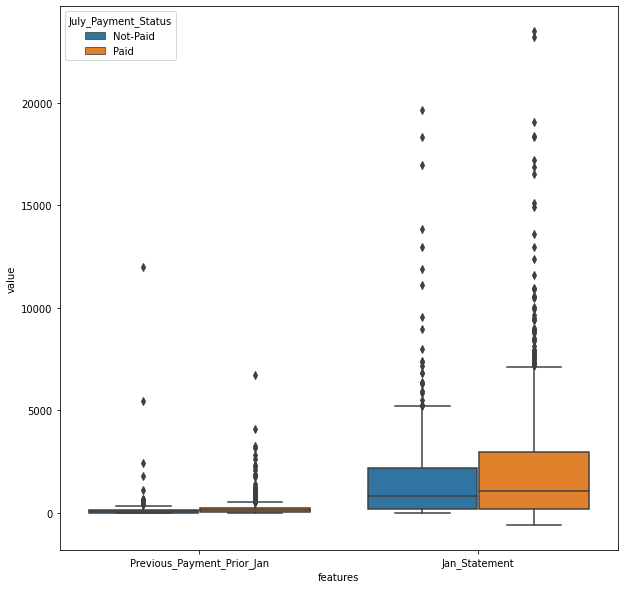

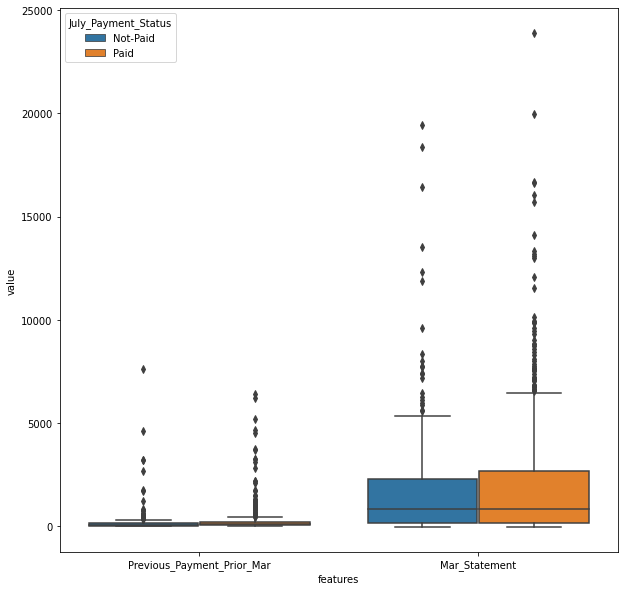

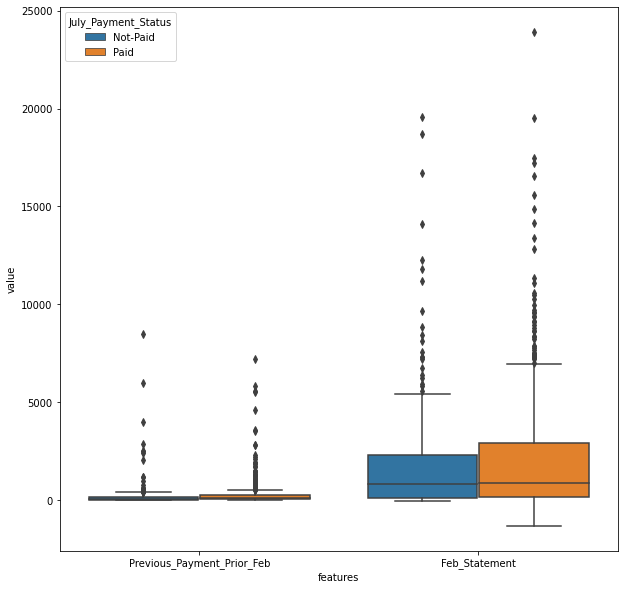

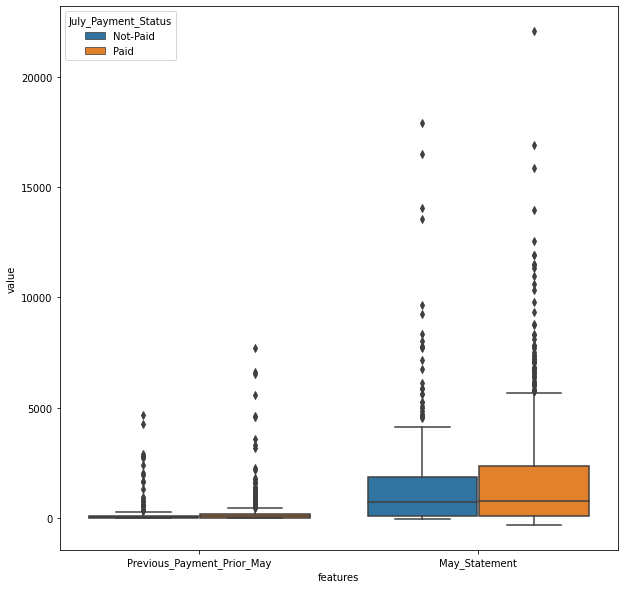

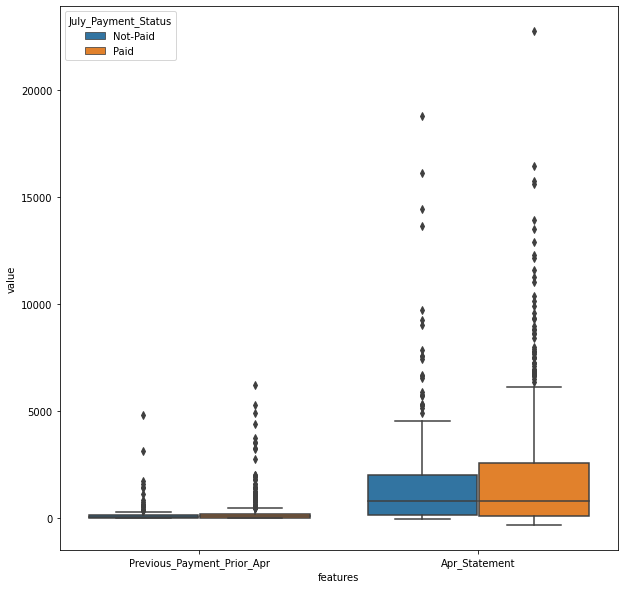

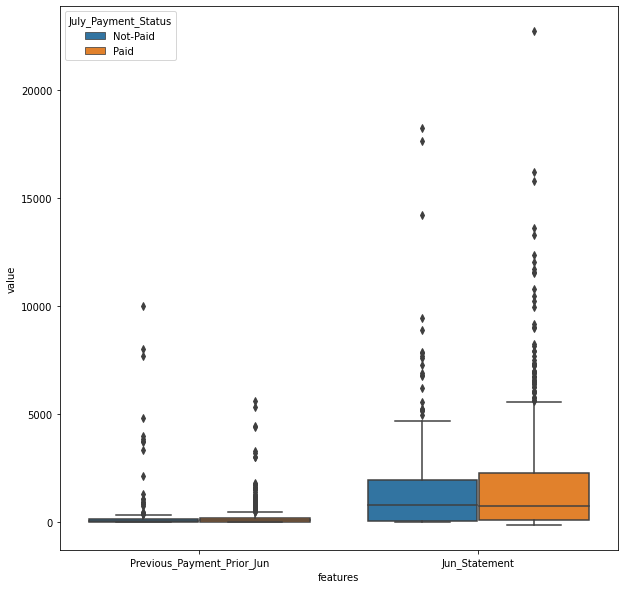

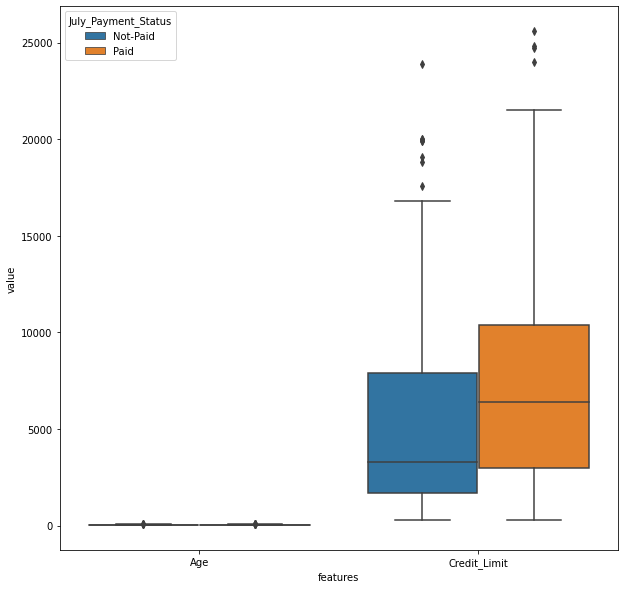

In [31]:
b=[b1,b2,b3,b4,b5,b6,b7]
for c in b:
    print(w(c))

In [32]:
def t(p):
    a=df[p] 
    a["July_Payment_Status"].replace([0,1], ["Paid", "Not-Paid"], inplace=True)
    v=pd.melt(a[:1000],id_vars="July_Payment_Status",var_name="features", value_name="value")
    plt.figure(figsize=(10,10))
    return sns.stripplot(x="features", y="value", hue="July_Payment_Status",data=v)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


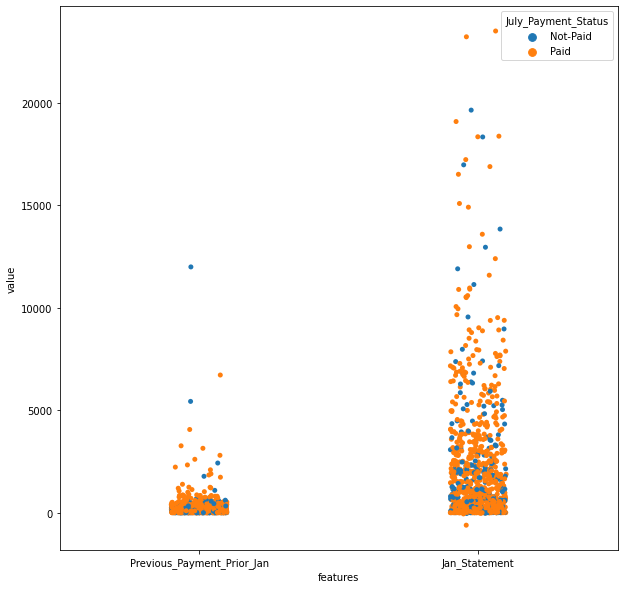

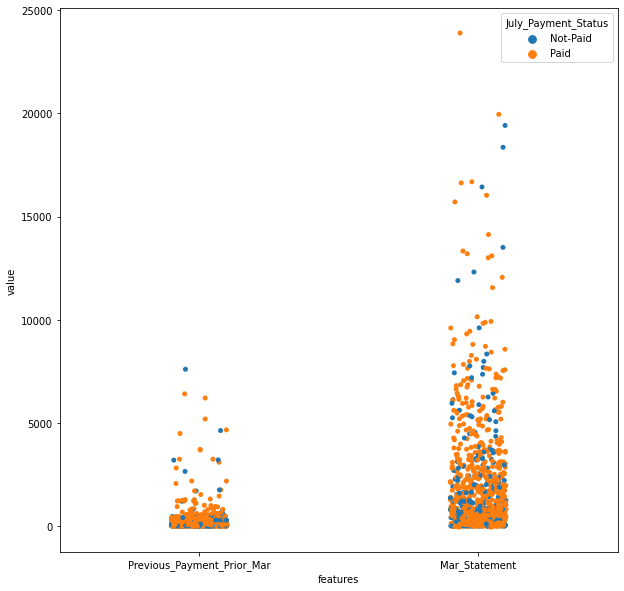

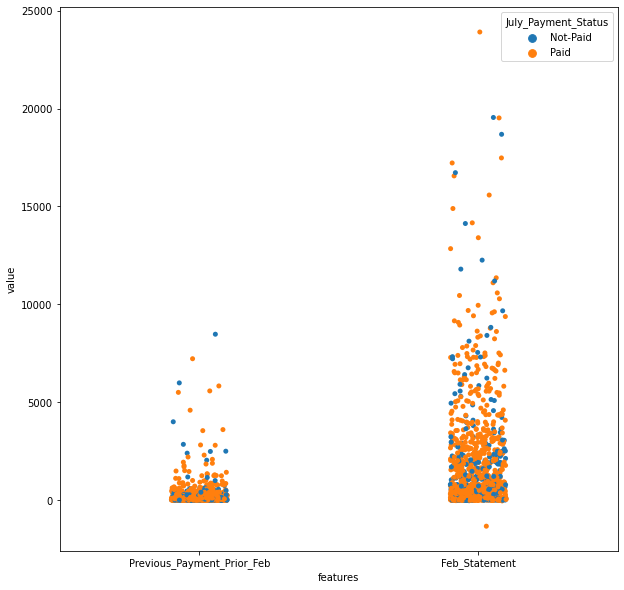

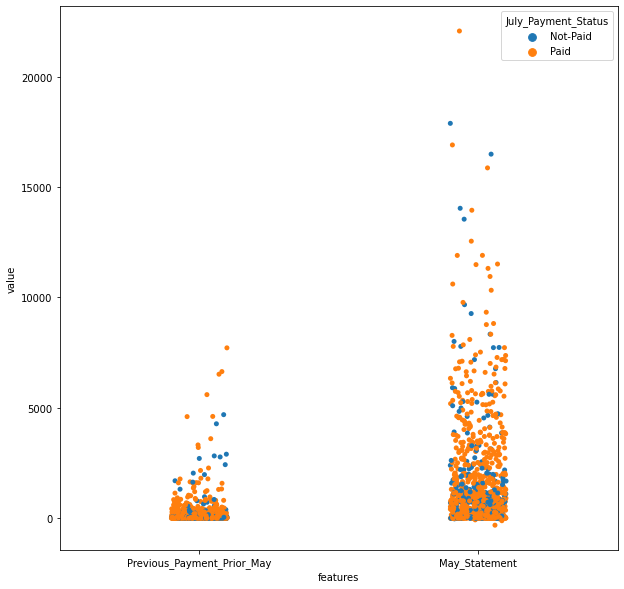

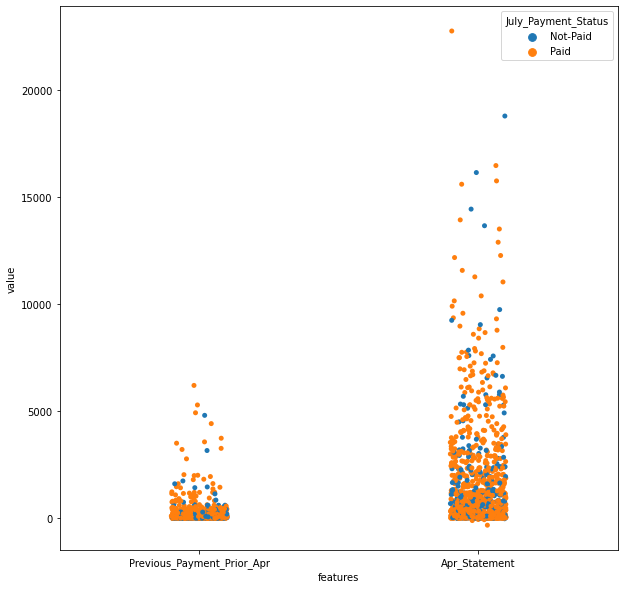

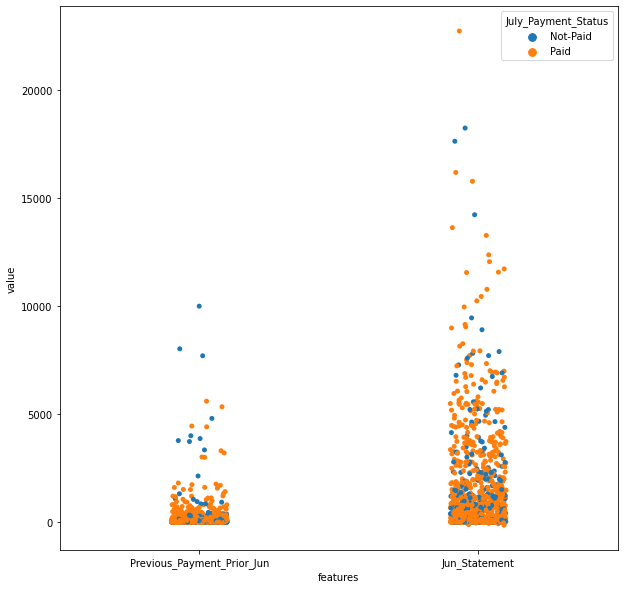

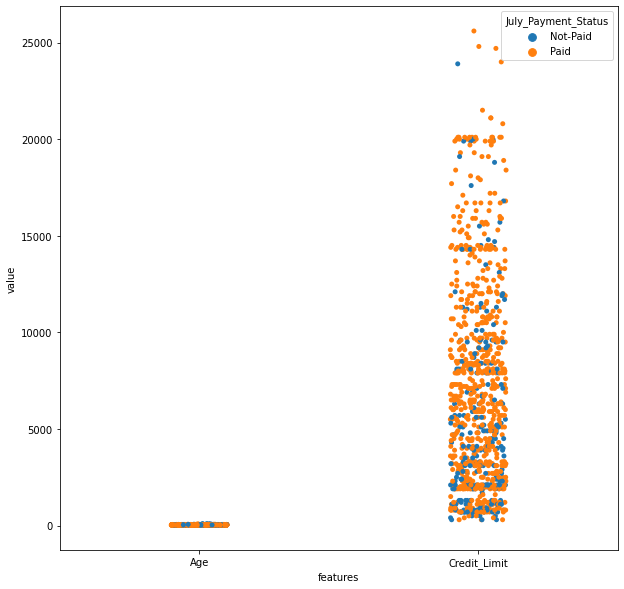

In [33]:
b=[b1,b2,b3,b4,b5,b6,b7]
for c in b:
    print(t(c))

In [34]:
def o(p):
    a=df[p] 
    a["July_Payment_Status"].replace([0,1], ["Paid", "Not-Paid"], inplace=True)
    plt.figure(figsize=(10,10))
    return sns.pairplot(a[:1000],hue="July_Payment_Status")

<Figure size 720x720 with 0 Axes>

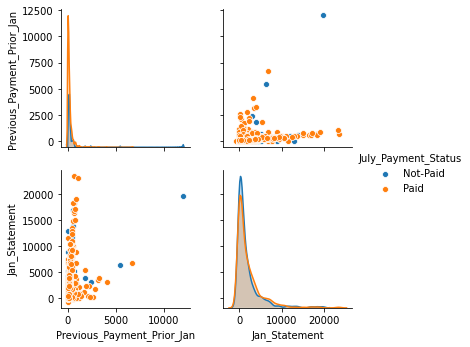

<Figure size 720x720 with 0 Axes>

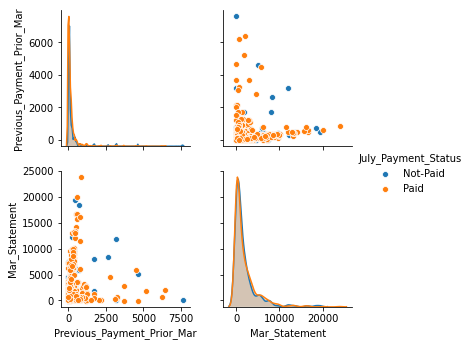

<Figure size 720x720 with 0 Axes>

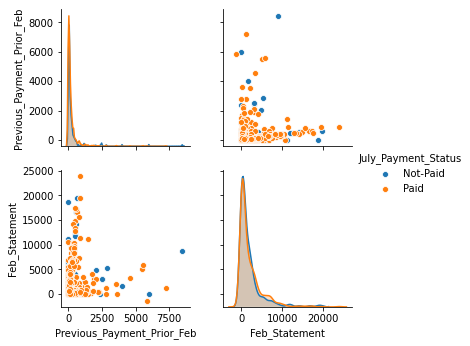

<Figure size 720x720 with 0 Axes>

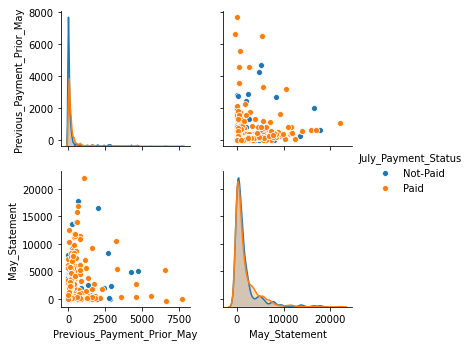

<Figure size 720x720 with 0 Axes>

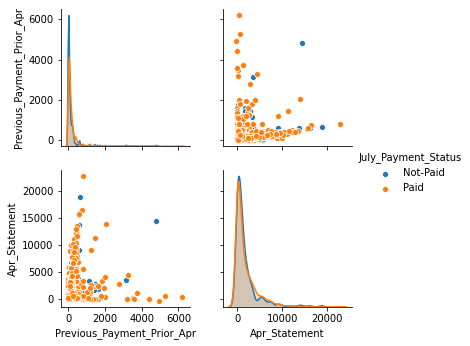

<Figure size 720x720 with 0 Axes>

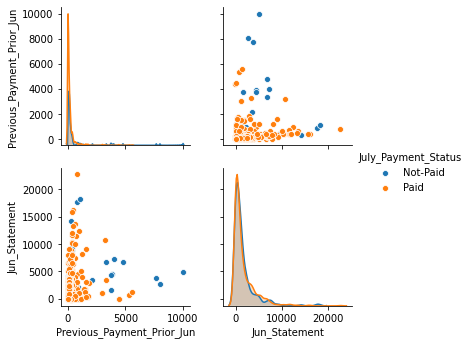

<Figure size 720x720 with 0 Axes>

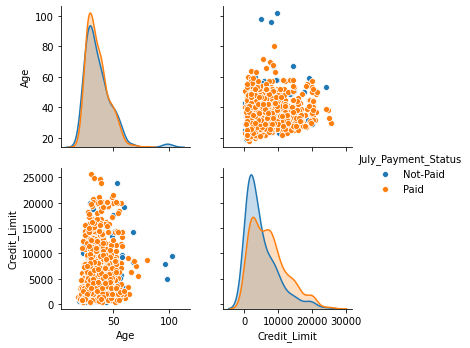

In [35]:
b=[b1,b2,b3,b4,b5,b6,b7]
for c in b:
    print(o(c))

##### Age and July_Payment_Status

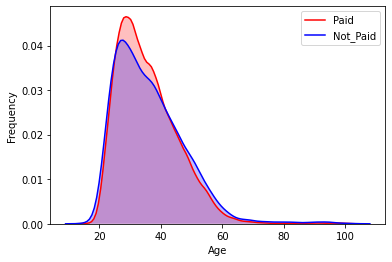

In [36]:
g = sns.kdeplot(df["Age"][(df["July_Payment_Status"] == 0) & (df["Age"].notnull())], color="Red",shade=True)
g = sns.kdeplot(df["Age"][(df["July_Payment_Status"] == 1) & (df["Age"].notnull())], color="Blue",shade=True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Paid","Not_Paid"])

##### Credit_Limit and July_Payment_Status

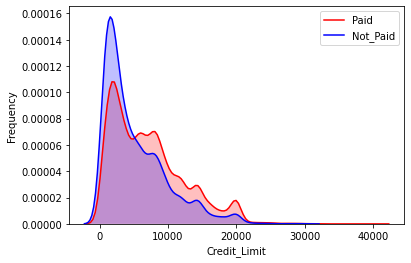

In [37]:
g = sns.kdeplot(df["Credit_Limit"][(df["July_Payment_Status"] == 0) & (df["Credit_Limit"].notnull())], color="Red",shade=True)
g = sns.kdeplot(df["Credit_Limit"][(df["July_Payment_Status"] == 1) & (df["Credit_Limit"].notnull())], color="Blue",shade=True)
g.set_xlabel("Credit_Limit")
g.set_ylabel("Frequency")
g = g.legend(["Paid","Not_Paid"])

##### Previous_Payment_Prior_Jan and July_Payment_Status

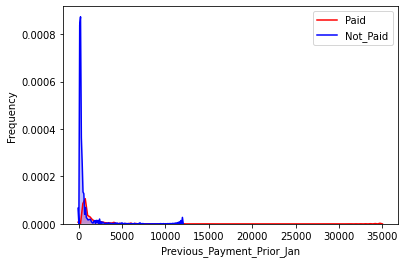

In [38]:
g = sns.kdeplot(df["Previous_Payment_Prior_Jan"][(df["July_Payment_Status"] == 0) & (df["Previous_Payment_Prior_Jan"].notnull())], color="Red",shade=True)
g = sns.kdeplot(df["Previous_Payment_Prior_Jan"][(df["July_Payment_Status"] == 1) & (df["Previous_Payment_Prior_Jan"].notnull())], color="Blue",shade=True)
g.set_xlabel("Previous_Payment_Prior_Jan")
g.set_ylabel("Frequency")
g = g.legend(["Paid","Not_Paid"])

##### Jan_Statement and July_Payment_Status

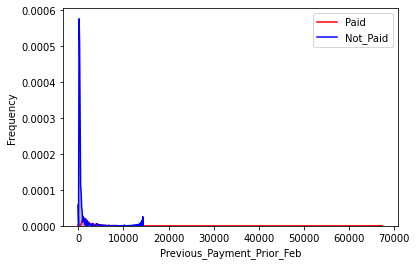

In [39]:
g = sns.kdeplot(df["Previous_Payment_Prior_Feb"][(df["July_Payment_Status"] == 0) & (df["Previous_Payment_Prior_Feb"].notnull())], color="Red",shade=True)
g = sns.kdeplot(df["Previous_Payment_Prior_Feb"][(df["July_Payment_Status"] == 1) & (df["Previous_Payment_Prior_Feb"].notnull())], color="Blue",shade=True)
g.set_xlabel("Previous_Payment_Prior_Feb")
g.set_ylabel("Frequency")
g = g.legend(["Paid","Not_Paid"])

#### Education and July_Payment_Status

In [40]:
df["Education"] = df["Education"].replace([0,4,5,6],2)

In [41]:
df["Education"].value_counts()

2.0    14821
1.0    10703
3.0     5058
Name: Education, dtype: int64

In [42]:
df[['Education', 'July_Payment_Status']].groupby("Education").mean()

,July_Payment_Status
Education,
1.0,0.195085
2.0,0.235747
3.0,0.256623


In [43]:
df["Education"] = df["Education"].replace([1,2,3],[0.195,0.235,.256])

In [44]:
df['Education'].value_counts()

0.235    14821
0.195    10703
0.256     5058
Name: Education, dtype: int64

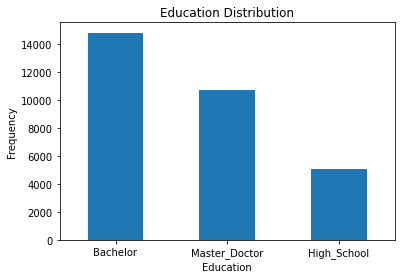

In [45]:
LABELS = ["Bachelor","Master_Doctor","High_School"]

count_classes = pd.value_counts(df['Education'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Education Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Education")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x1e1e64feeb8>,
 [Text(0, 0, 'Master_Doctorial'),
  Text(0, 0, 'Bachelor'),
  Text(0, 0, 'High_School')])

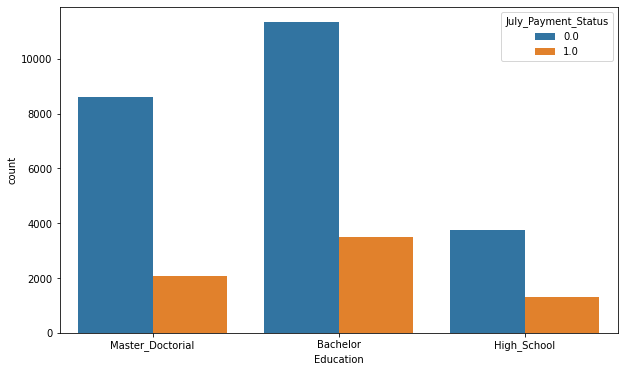

In [46]:
LABELS = ["Master_Doctorial","Bachelor","High_School"]
plt.figure(figsize=(10,6))
sns.countplot(x="Education",data=df, hue='July_Payment_Status')
plt.xticks(range(3), LABELS)

#### Marital Status and July_Payment_Status

In [47]:
df['Marital_Status']=df['Marital_Status'].replace([0,3,4],2)

In [48]:
df['Marital_Status'].value_counts()

2.0    16738
1.0    13844
Name: Marital_Status, dtype: int64

In [49]:
df[['Marital_Status', 'July_Payment_Status']].groupby("Marital_Status").mean()

,July_Payment_Status
Marital_Status,
1.0,0.236565
2.0,0.215378


In [50]:
df['Marital_Status']=df['Marital_Status'].replace([1,2],[.236,.215])

In [51]:
df['Marital_Status'].value_counts()

0.215    16738
0.236    13844
Name: Marital_Status, dtype: int64

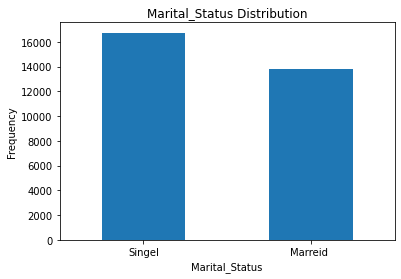

In [52]:
LABELS = ["Singel","Marreid "]

count_classes = pd.value_counts(df['Marital_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Marital_Status Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Marital_Status")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x1e1e65d3240>,
 [Text(0, 0, 'Singel'), Text(0, 0, 'Marreid ')])

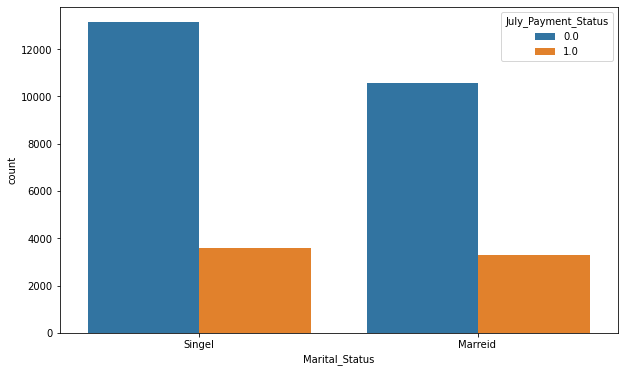

In [53]:
LABELS = ["Singel","Marreid "]
plt.figure(figsize=(10,6))
sns.countplot(x="Marital_Status",data=df, hue="July_Payment_Status")
plt.xticks(range(2), LABELS)

#### Sex and July_Payment_Status

In [54]:
df['Sex']=df['Sex'].replace([0,3,4,5,6,7,8],2)

In [55]:
df[['Sex', 'July_Payment_Status']].groupby("Sex").mean()

,July_Payment_Status
Sex,
1.0,0.245146
2.0,0.211754


In [56]:
df['Sex']=df['Sex'].replace([1,2],[.245,.212])

In [57]:
df['Sex'].value_counts()

0.212    18479
0.245    12103
Name: Sex, dtype: int64

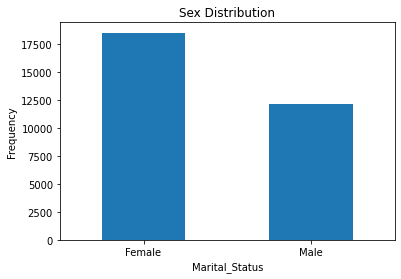

In [58]:
LABELS = ["Female","Male"]

count_classes = pd.value_counts(df['Sex'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Sex Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Marital_Status")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x1e1e665e4e0>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male')])

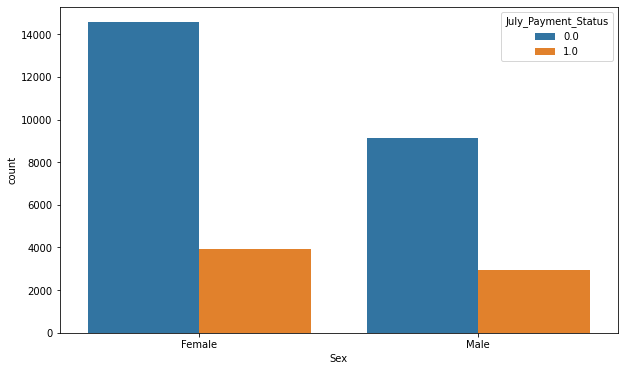

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x="Sex",data=df, hue="July_Payment_Status")
plt.xticks(range(2), LABELS)

### Apr_Repay_Status and July_Payment_Status

In [60]:
df['Apr_Repay_Status']=df['Apr_Repay_Status'].replace([-2],-1)
df['Apr_Repay_Status']=df['Apr_Repay_Status'].replace([1,3,4,5,6,7,8,9,10,11,12],2)

In [61]:
df[['Apr_Repay_Status', 'July_Payment_Status']].groupby("Apr_Repay_Status").mean()

,July_Payment_Status
Apr_Repay_Status,
-1.0,0.173693
0.0,0.183912
2.0,0.527434


In [62]:
df['Apr_Repay_Status']=df['Apr_Repay_Status'].replace([-1,0,2],[.173,.183,.527])

In [63]:
df['Apr_Repay_Status'].value_counts()

0.183    16546
0.173    10081
0.527     3955
Name: Apr_Repay_Status, dtype: int64

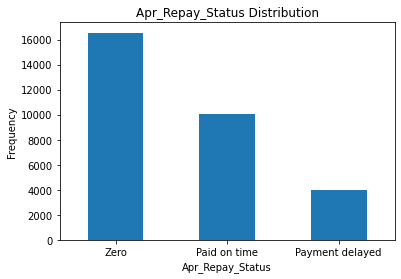

In [64]:
LABELS = ["Zero","Paid on time","Payment delayed"]

count_classes = pd.value_counts(df['Apr_Repay_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Apr_Repay_Status Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Apr_Repay_Status")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x1e1e66a0c50>,
 [Text(0, 0, 'Paid on time'),
  Text(0, 0, 'Zero'),
  Text(0, 0, 'Payment delayed')])

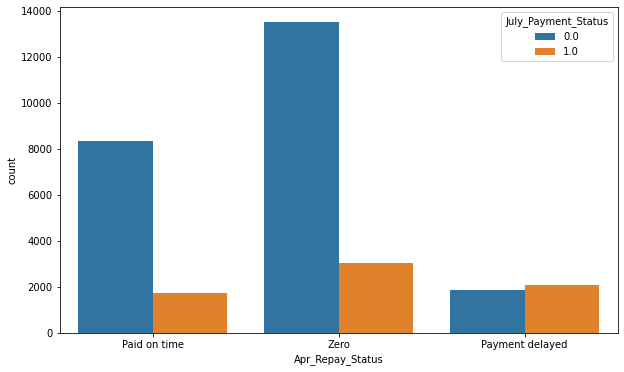

In [65]:
LABELS = ["Paid on time","Zero","Payment delayed"]
plt.figure(figsize=(10,6))
sns.countplot(x="Apr_Repay_Status",data=df, hue="July_Payment_Status")
plt.xticks(range(3), LABELS)

#### Jan_Repay_Status and July_Payment_Status

In [66]:
df['Jan_Repay_Status']=df['Jan_Repay_Status'].replace([-2],-1)
df['Jan_Repay_Status']=df['Jan_Repay_Status'].replace([2,3,4,5,6,7,8,9,10,11,12],1)

In [67]:
df[['Jan_Repay_Status', 'July_Payment_Status']].groupby("Jan_Repay_Status").mean()

,July_Payment_Status
Jan_Repay_Status,
-1.0,0.157239
0.0,0.129132
1.0,0.500069


In [68]:
df['Jan_Repay_Status']=df['Jan_Repay_Status'].replace([-1,0,1],[.157,.129,.500])

In [69]:
df['Jan_Repay_Status'].value_counts()

0.129    14822
0.157     8503
0.500     7257
Name: Jan_Repay_Status, dtype: int64

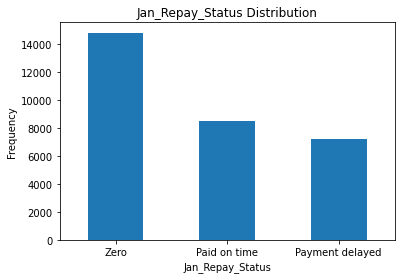

In [70]:
LABELS = ["Zero","Paid on time","Payment delayed"]

count_classes = pd.value_counts(df['Jan_Repay_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Jan_Repay_Status Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Jan_Repay_Status")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x1e1e77c2be0>,
 [Text(0, 0, 'Zero'),
  Text(0, 0, 'Paid on time'),
  Text(0, 0, 'Payment delayed')])

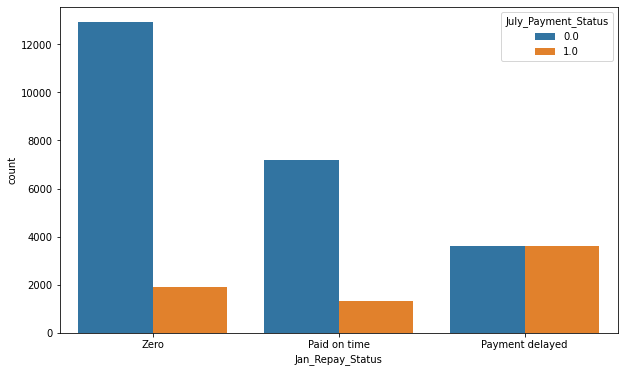

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(x="Jan_Repay_Status",data=df, hue="July_Payment_Status")
plt.xticks(range(3), LABELS)

#### Feb_Repay_Status and July_Payment_Status

In [72]:
df['Feb_Repay_Status']=df['Feb_Repay_Status'].replace([-2],-1)
df['Feb_Repay_Status']=df['Feb_Repay_Status'].replace([1,3,4,5,6,7,8,9,10,11,12],2)

In [73]:
df[['Feb_Repay_Status', 'July_Payment_Status']].groupby("Feb_Repay_Status").mean()

,July_Payment_Status
Feb_Repay_Status,
-1.0,0.169229
0.0,0.159702
2.0,0.549498


In [74]:
df['Feb_Repay_Status']=df['Feb_Repay_Status'].replace([-1,0,2],[.169,.159,.549])

In [75]:
df['Feb_Repay_Status'].value_counts()

0.159    15817
0.169     9886
0.549     4879
Name: Feb_Repay_Status, dtype: int64

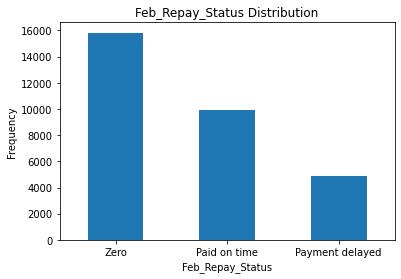

In [76]:
LABELS = ["Zero","Paid on time","Payment delayed"]

count_classes = pd.value_counts(df['Feb_Repay_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Feb_Repay_Status Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Feb_Repay_Status")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x1e1e78a32b0>,
 [Text(0, 0, 'Zero'),
  Text(0, 0, 'Paid on time'),
  Text(0, 0, 'Payment delayed')])

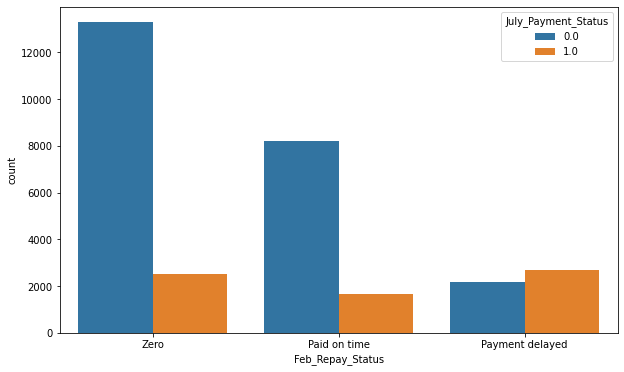

In [77]:
plt.figure(figsize=(10,6))
sns.countplot(x="Feb_Repay_Status",data=df, hue="July_Payment_Status")
plt.xticks(range(3), LABELS)

#### Mar_Repay_Status and July_Payment_Status

In [78]:
df['Mar_Repay_Status']=df['Mar_Repay_Status'].replace([-2],-1)
df['Mar_Repay_Status']=df['Mar_Repay_Status'].replace([1,3,4,5,6,7,8,9,10,11,12],2)

In [79]:
df[['Mar_Repay_Status', 'July_Payment_Status']].groupby("Mar_Repay_Status").mean()

,July_Payment_Status
Mar_Repay_Status,
-1.0,0.168270
0.0,0.175195
2.0,0.519119


In [80]:

df['Mar_Repay_Status']=df['Mar_Repay_Status'].replace([-1,0,2],[.168,.175,.519])

In [81]:
df['Mar_Repay_Status'].value_counts()

0.175    15868
0.168    10085
0.519     4629
Name: Mar_Repay_Status, dtype: int64

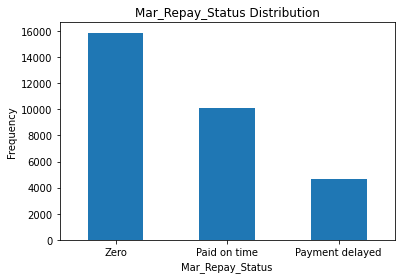

In [82]:
LABELS = ["Zero","Paid on time","Payment delayed"]

count_classes = pd.value_counts(df['Mar_Repay_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Mar_Repay_Status Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Mar_Repay_Status")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x1e1e79679b0>,
 [Text(0, 0, 'Paid on time'),
  Text(0, 0, 'Zero'),
  Text(0, 0, 'Payment delayed')])

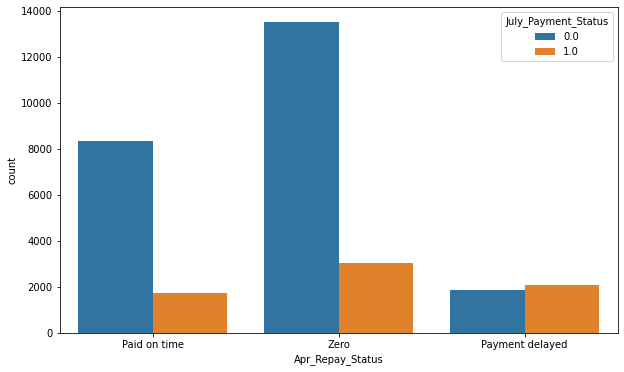

In [83]:
LABELS = ["Paid on time","Zero","Payment delayed"]
plt.figure(figsize=(10,6))
sns.countplot(x="Apr_Repay_Status",data=df, hue="July_Payment_Status")
plt.xticks(range(3), LABELS)

#### May_Repay_Status and July_Payment_Status

In [84]:
df['May_Repay_Status']=df['May_Repay_Status'].replace([-2],-1)
df['May_Repay_Status']=df['May_Repay_Status'].replace([1,3,4,5,6,7,8,9,10,11,12],2)

In [85]:
df[['May_Repay_Status', 'July_Payment_Status']].groupby("May_Repay_Status").mean()

,July_Payment_Status
May_Repay_Status,
-1.0,0.177990
0.0,0.189048
2.0,0.544813


In [86]:

df['May_Repay_Status']=df['May_Repay_Status'].replace([-1,0,2],[.177,.189,.544])

In [87]:
df['May_Repay_Status'].value_counts()

0.189    17038
0.177    10141
0.544     3403
Name: May_Repay_Status, dtype: int64

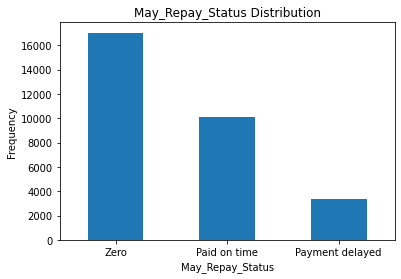

In [88]:
LABELS = ["Zero","Paid on time","Payment delayed"]

count_classes = pd.value_counts(df['May_Repay_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("May_Repay_Status Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("May_Repay_Status")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x1e1e7a310b8>,
 [Text(0, 0, 'Paid on time'),
  Text(0, 0, 'Zero'),
  Text(0, 0, 'Payment delayed')])

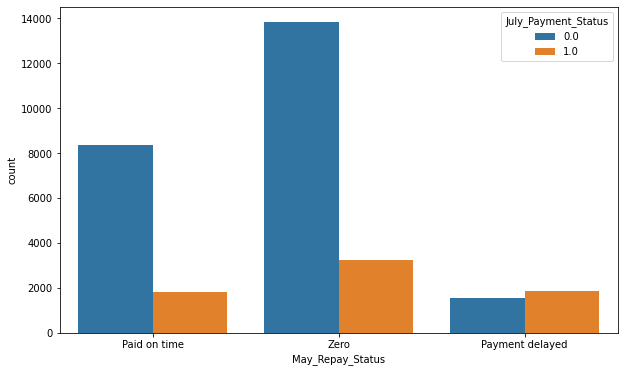

In [89]:
LABELS = ["Paid on time","Zero","Payment delayed"]
plt.figure(figsize=(10,6))
sns.countplot(x="May_Repay_Status",data=df, hue="July_Payment_Status")
plt.xticks(range(3), LABELS)

#### Jun_Repay_Status and July_Payment_Status

In [90]:
df['Jun_Repay_Status']=df['Jun_Repay_Status'].replace([-2],-1)
df['Jun_Repay_Status']=df['Jun_Repay_Status'].replace([1,3,4,5,6,7,8,9,10,11,12],2)

In [91]:
df[['Jun_Repay_Status', 'July_Payment_Status']].groupby("Jun_Repay_Status").mean()

,July_Payment_Status
Jun_Repay_Status,
-1.0,0.184631
0.0,0.188755
2.0,0.517409


In [92]:

df['Jun_Repay_Status']=df['Jun_Repay_Status'].replace([-1,0,2],[.184,.188,.517])

In [93]:
df['Jun_Repay_Status'].value_counts()

0.188    16381
0.184    10697
0.517     3504
Name: Jun_Repay_Status, dtype: int64

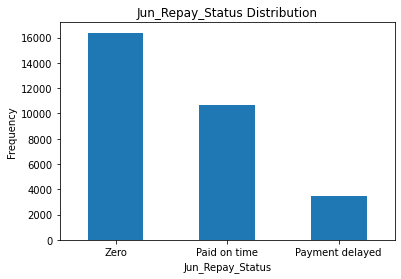

In [94]:
LABELS = ["Zero","Paid on time","Payment delayed"]

count_classes = pd.value_counts(df['Jun_Repay_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Jun_Repay_Status Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Jun_Repay_Status")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x1e1e7b07e10>,
 [Text(0, 0, 'Paid on time'),
  Text(0, 0, 'Zero'),
  Text(0, 0, 'Payment delayed')])

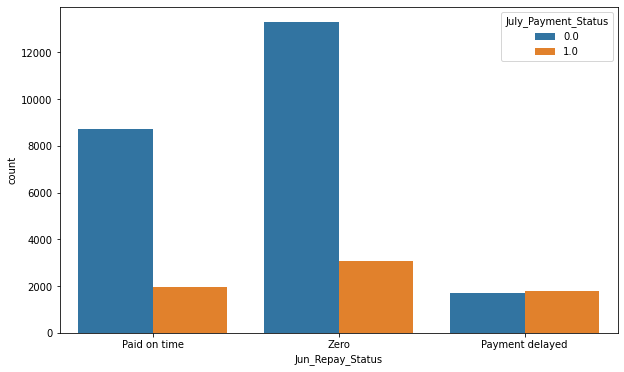

In [95]:
LABELS = ["Paid on time","Zero","Payment delayed"]
plt.figure(figsize=(10,6))
sns.countplot(x="Jun_Repay_Status",data=df, hue="July_Payment_Status")
plt.xticks(range(3), LABELS)

#### Statistiacal Analysis

In [96]:
July_Payment_Status_summary = df.groupby("July_Payment_Status")
July_Payment_Status_summary.mean().reset_index()

,July_Payment_Status,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,...,Mar_Statement,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement
0,0.0,7100.260737,0.224720,0.223793,0.224364,35.671344,0.194253,263.188522,2086.291561,0.198632,...,1909.467287,0.206611,224.762174,1752.356227,0.207980,221.486009,1631.559291,0.210000,241.121313,1574.468282
1,1.0,5194.492326,0.226231,0.226822,0.224996,36.393993,0.330133,173.719647,1961.591952,0.313407,...,1832.938755,0.284755,159.221664,1705.260996,0.281516,162.268807,1612.100145,0.273549,178.252762,1571.503945


In [97]:
July_Payment_Status_summary = df.groupby("Sex")
July_Payment_Status_summary.mean().reset_index()

,Sex,Credit_Limit,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,0.212,6773.339466,0.224788,0.224766,35.172710,0.222508,244.102685,1978.692510,0.220534,253.245183,...,0.221107,210.141244,1696.080938,0.221601,207.906737,1594.928197,0.222273,226.374326,1542.866509,0.211754
1,0.245,6516.066033,0.223995,0.224109,36.843456,0.228355,241.470049,2179.689029,0.230435,252.414759,...,0.228900,209.828807,1811.506511,0.228986,208.556738,1676.426436,0.227387,227.899296,1621.033144,0.245146


In [98]:
July_Payment_Status_summary = df.groupby("Marital_Status")
July_Payment_Status_summary.mean().reset_index()

,Marital_Status,Credit_Limit,Sex,Education,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,0.215,6180.858358,0.225511,0.221066,32.252909,0.223111,243.060721,1991.981932,0.224145,249.123123,...,0.225085,207.050367,1691.092980,0.225908,211.259803,1575.541063,0.225827,229.221602,1532.965126,0.215378
1,0.236,7264.755851,0.224514,0.228594,40.163513,0.226890,243.060905,2138.344527,0.224825,257.502943,...,0.223111,213.605103,1803.021428,0.222849,204.420991,1689.617235,0.222446,224.265037,1623.174232,0.236565


#### Corolation

In [99]:
pd.DataFrame(abs(df.corr()['July_Payment_Status']).sort_values(ascending = False))

,July_Payment_Status
July_Payment_Status,1.000000
Jan_Repay_Status,0.368571
Feb_Repay_Status,0.338767
Mar_Repay_Status,0.297600
Apr_Repay_Status,0.279388
May_Repay_Status,0.271306
Jun_Repay_Status,0.251976
Credit_Limit,0.154052
Education,0.055369
Previous_Payment_Prior_Jan,0.053577


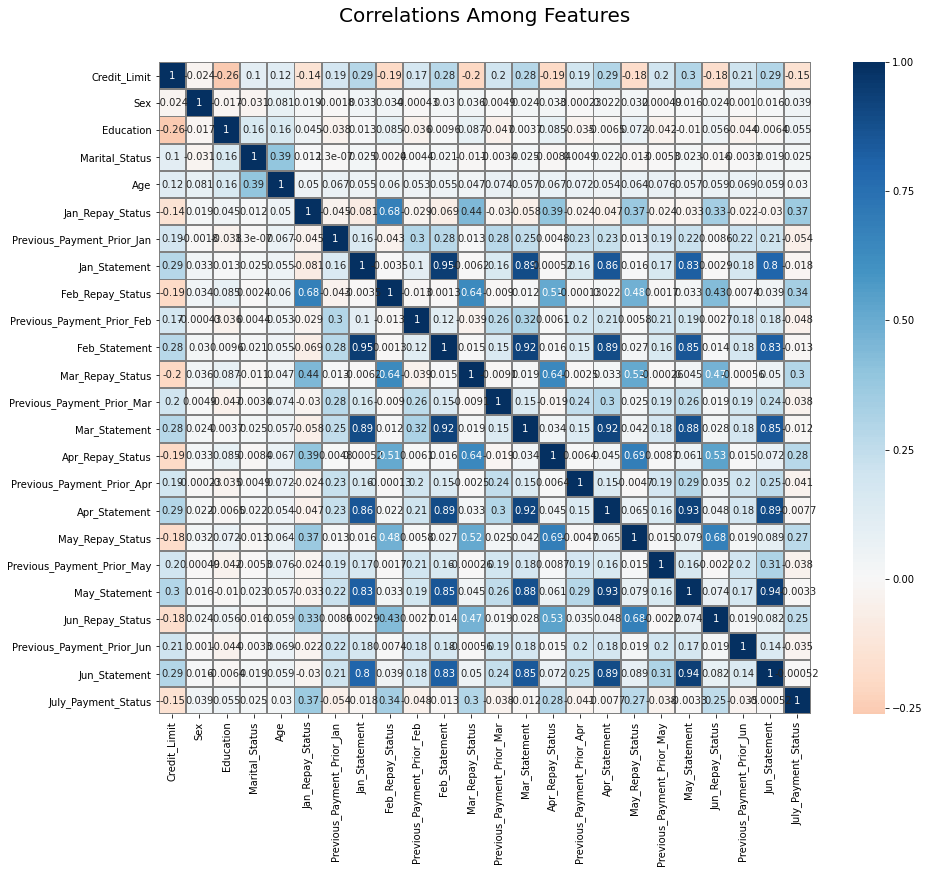

In [100]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='gray',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

In [101]:
pd.set_option('display.max_columns',50)

##### Splitting the data

In [102]:
X=df.drop('July_Payment_Status',axis=1)
y=df['July_Payment_Status']

In [103]:
X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, test_size=0.2, random_state=42)

#### Normalization

In [104]:
from sklearn import preprocessing
from sklearn.preprocessing import QuantileTransformer

In [105]:
quantile_transformer = preprocessing.QuantileTransformer(
    output_distribution='normal', random_state=0)


In [106]:
M=['Previous_Payment_Prior_Jan', 'Previous_Payment_Prior_Feb','Previous_Payment_Prior_Mar','Previous_Payment_Prior_Apr'
  ,'Previous_Payment_Prior_May','Previous_Payment_Prior_Jun','Jan_Statement','Feb_Statement','Mar_Statement','Apr_Statement'
  ,'May_Statement','Jun_Statement','Credit_Limit','Age']

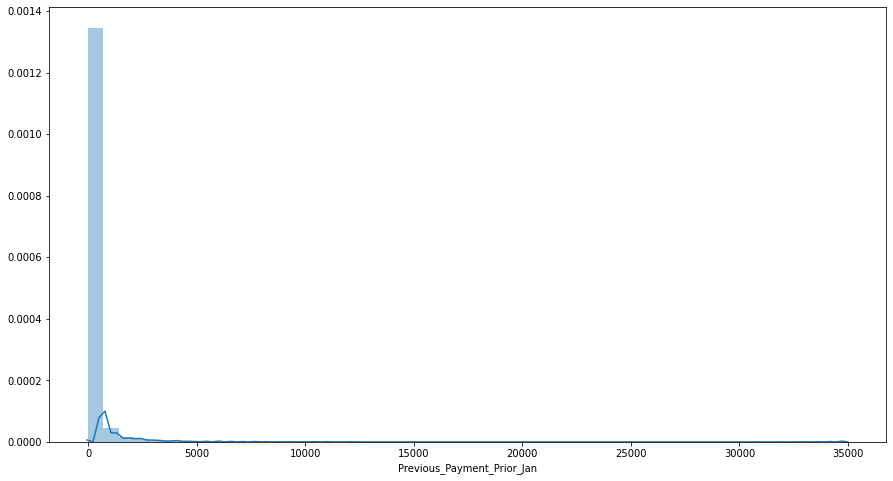

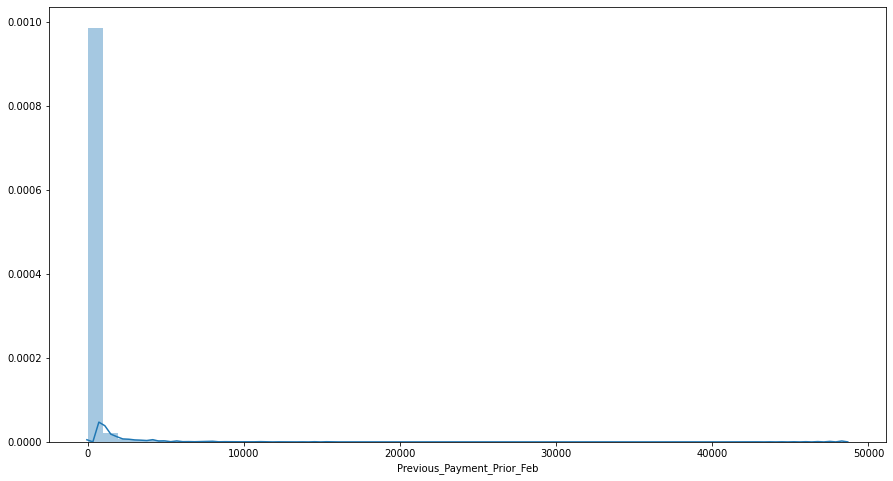

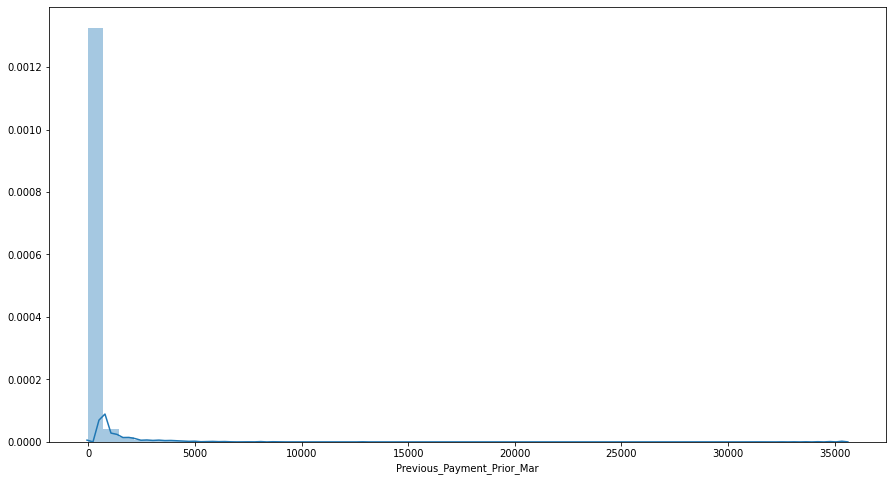

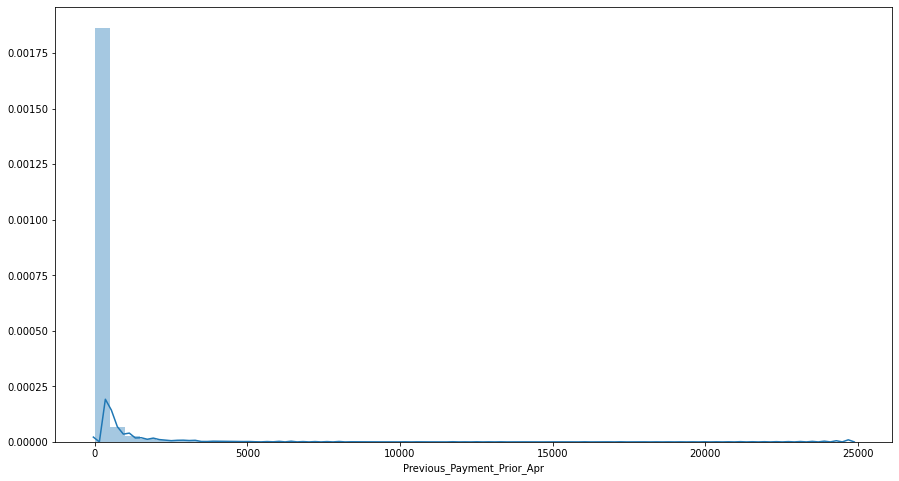

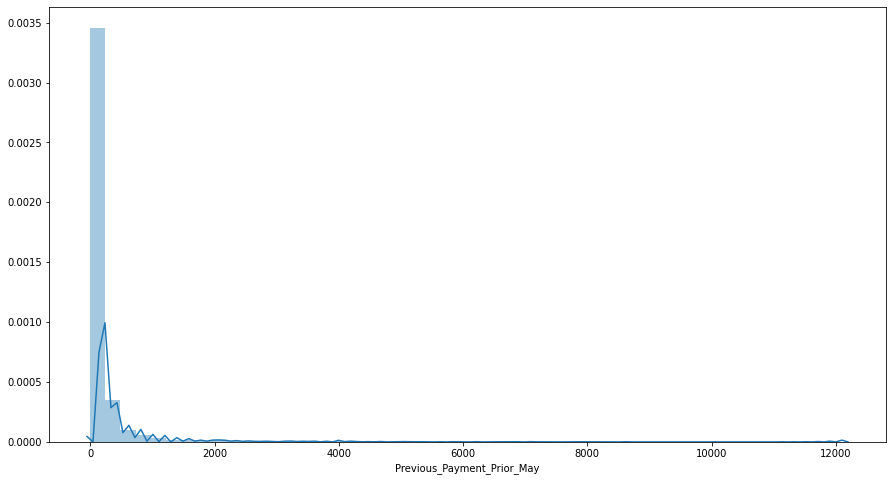

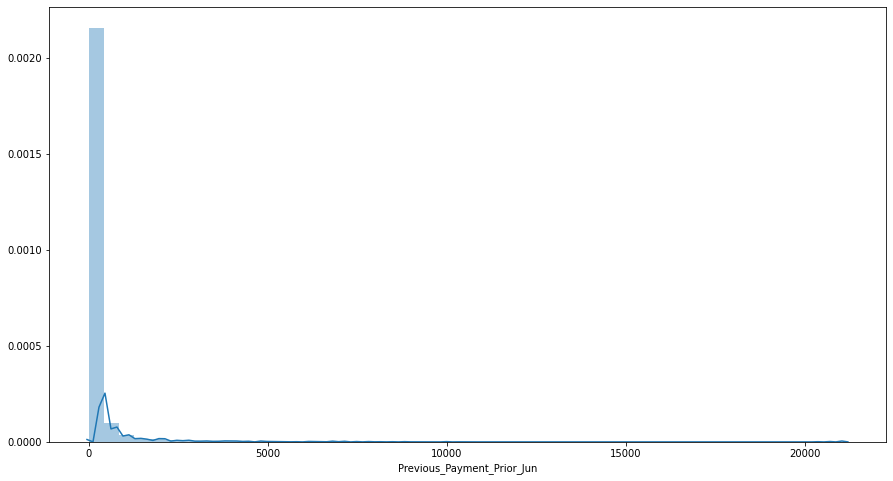

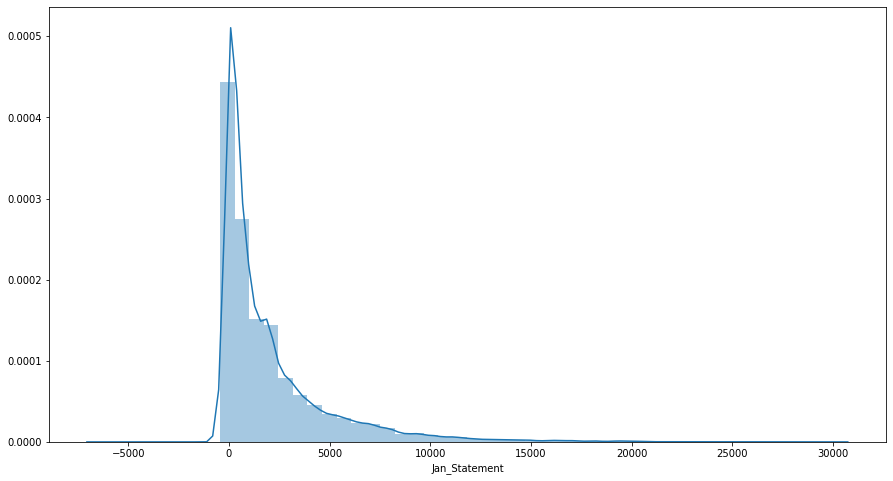

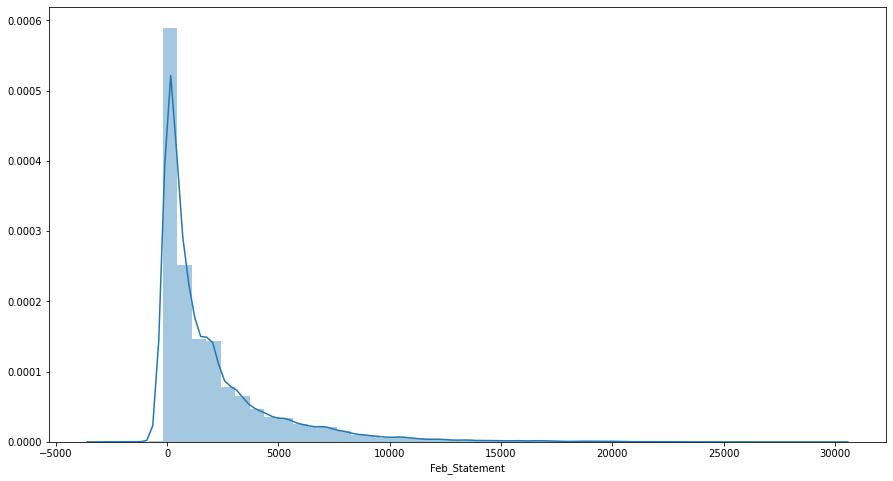

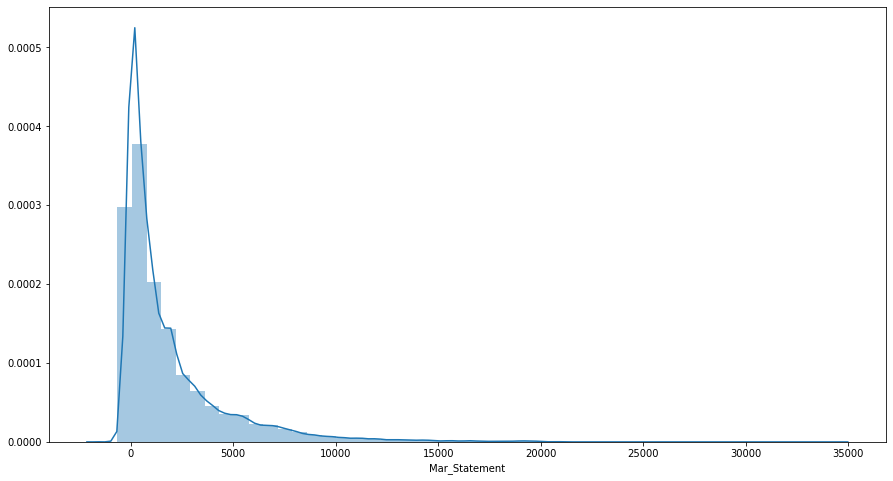

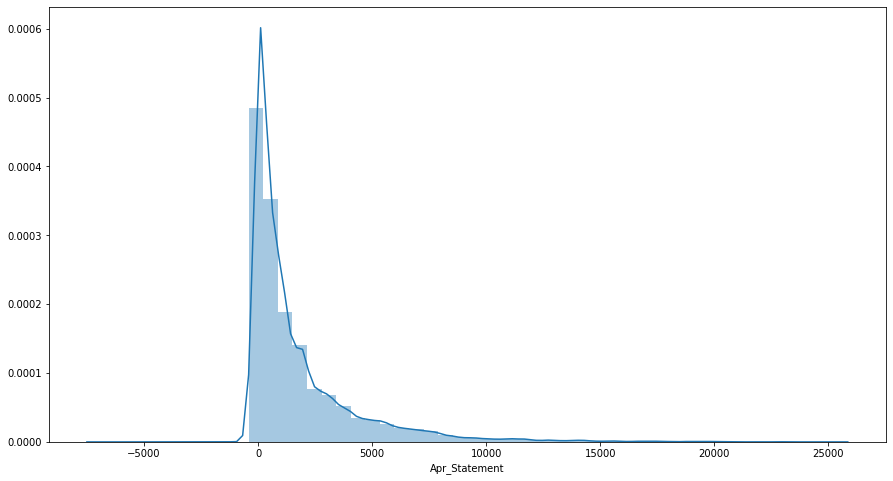

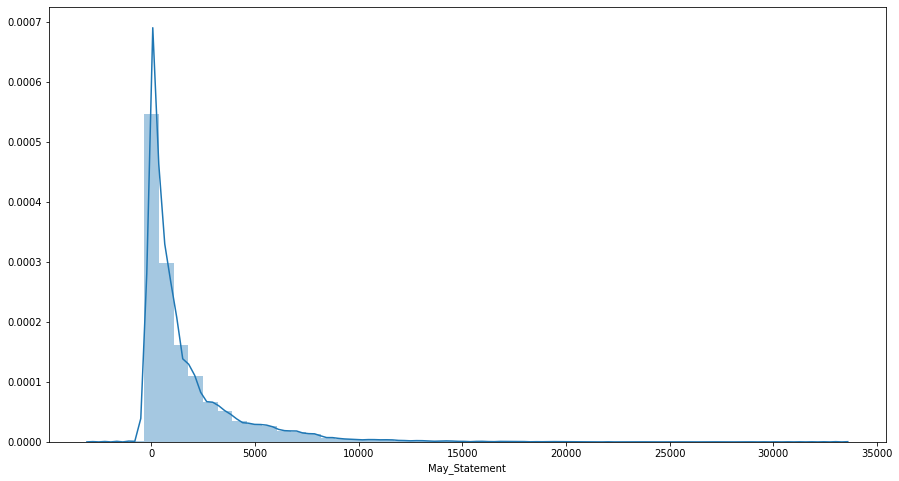

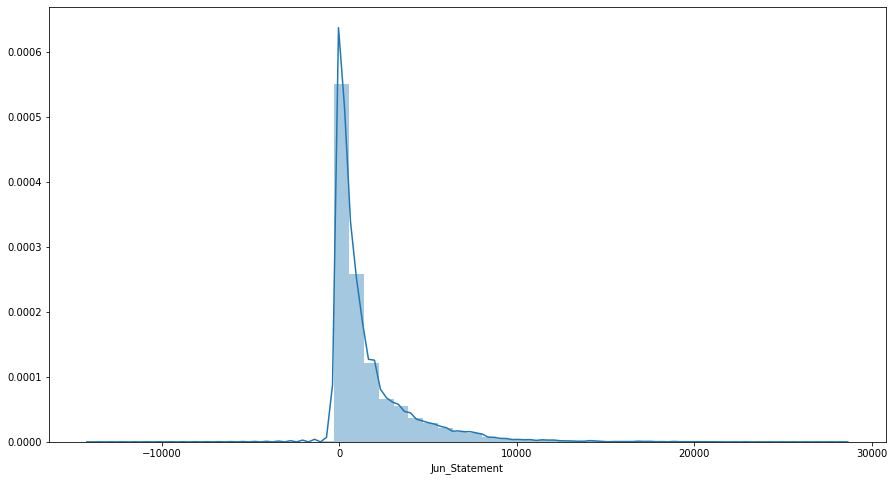

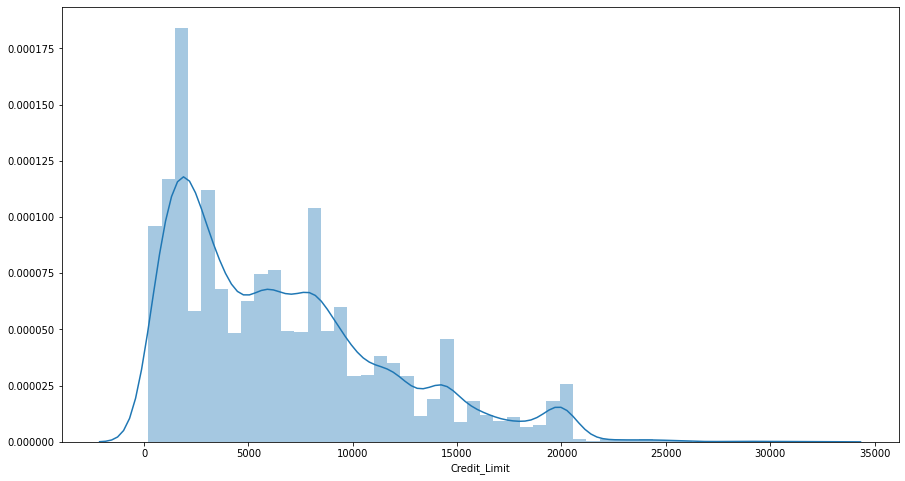

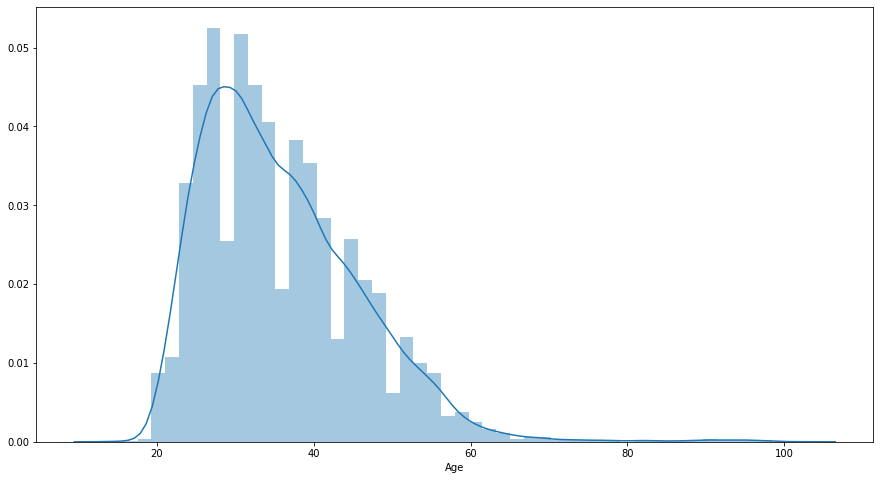

In [107]:
for b in M:
    plt.figure(figsize=(15,8))
    sns.distplot(X_train[b])   

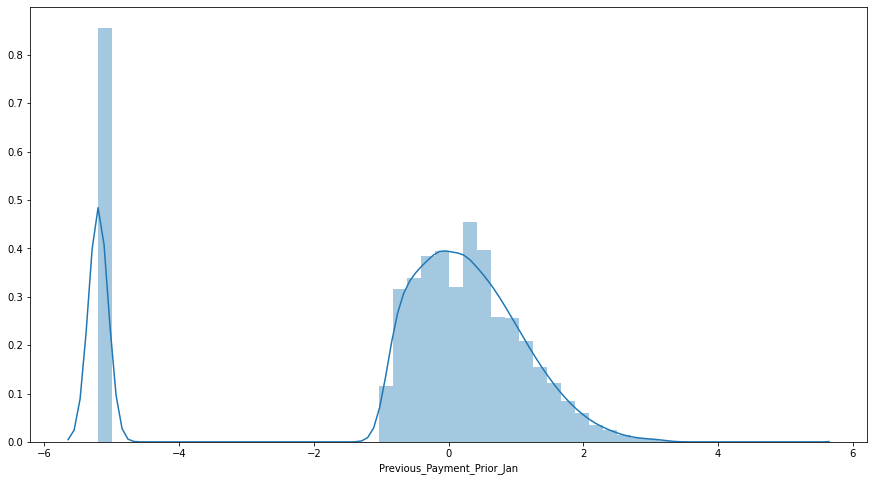

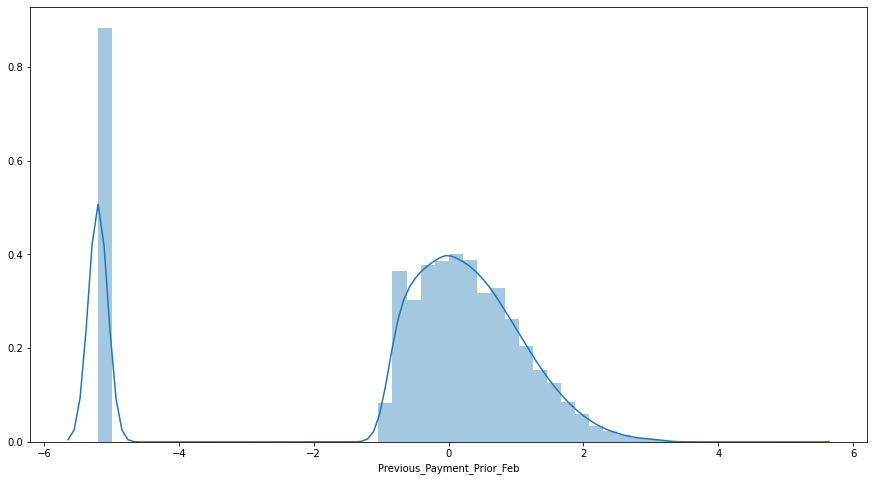

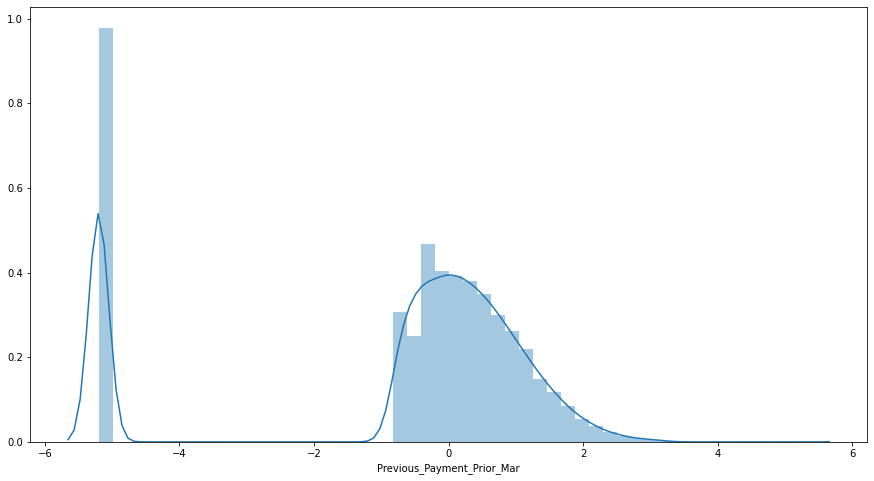

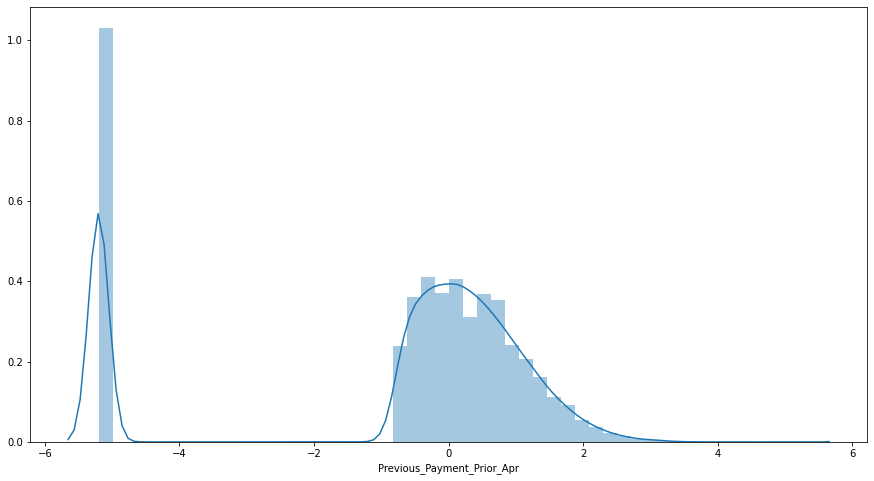

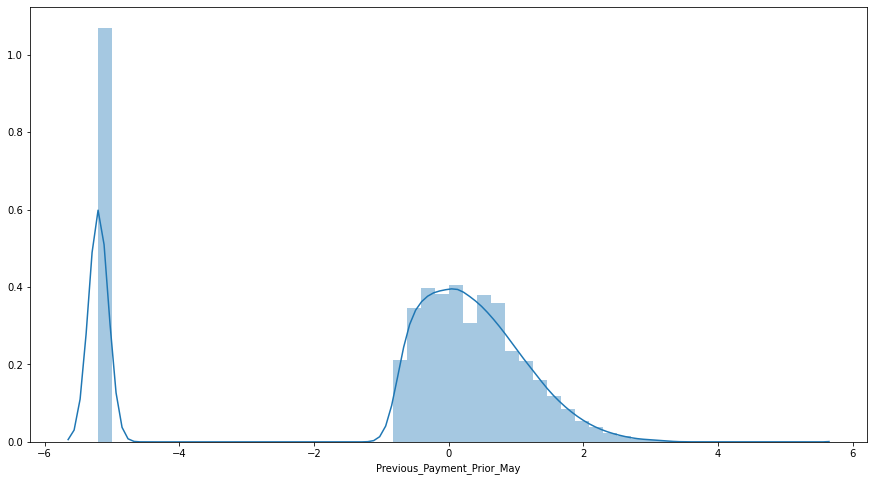

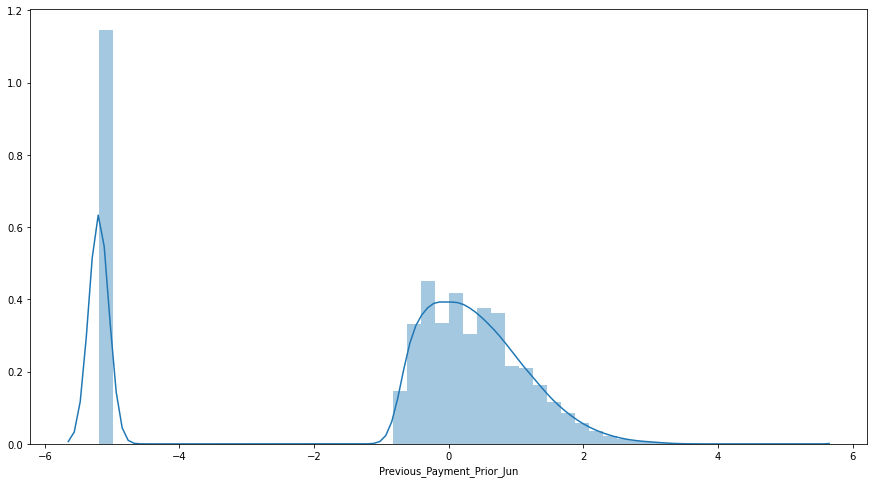

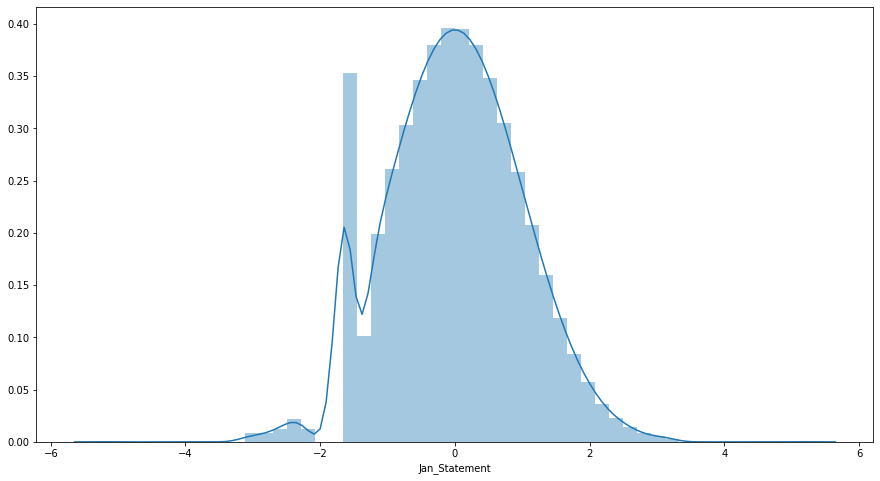

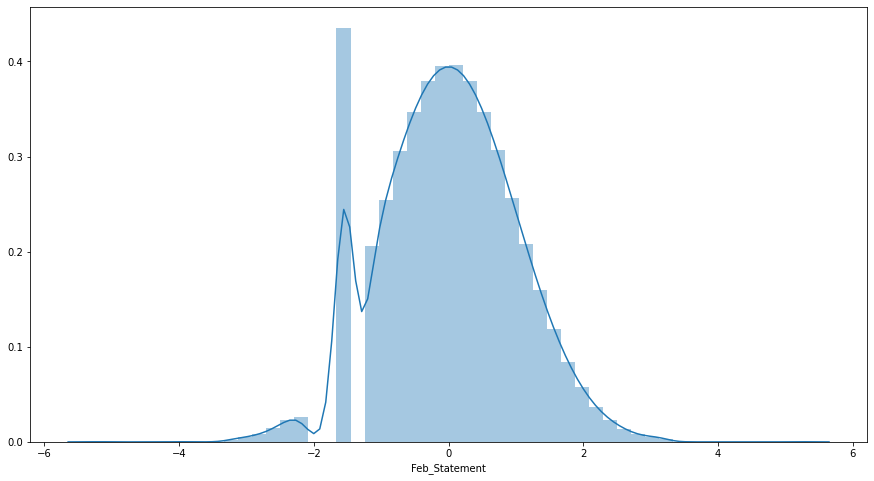

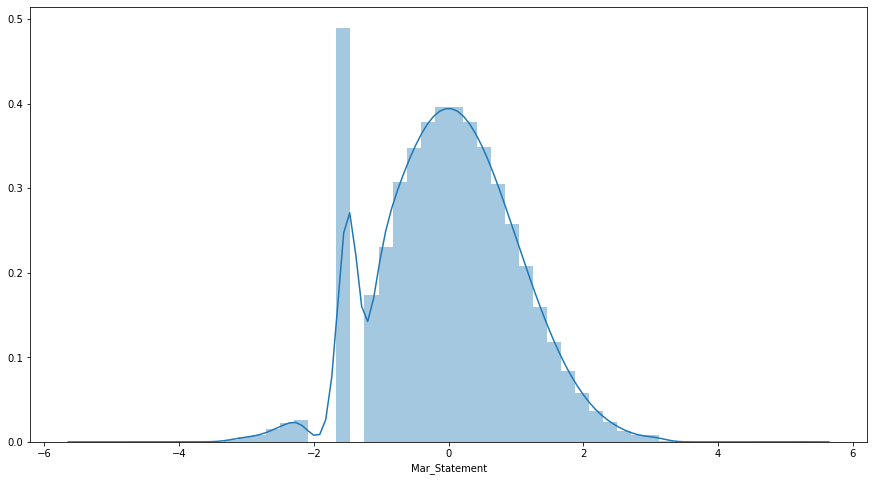

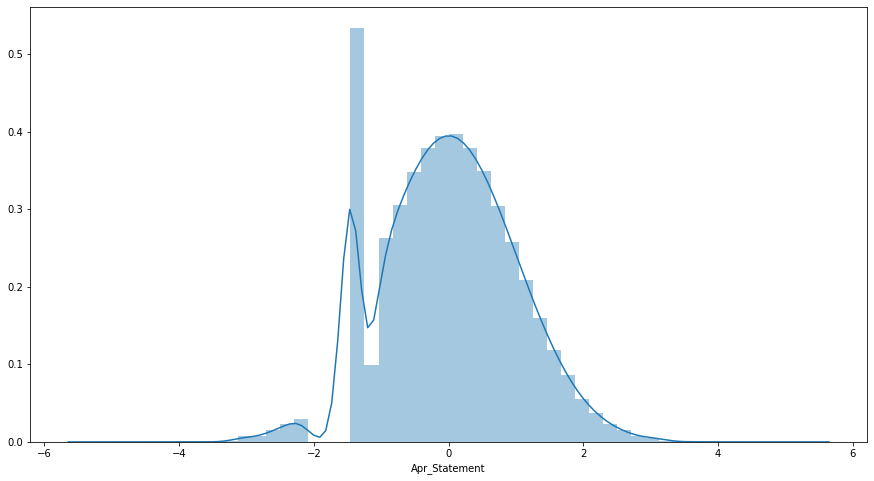

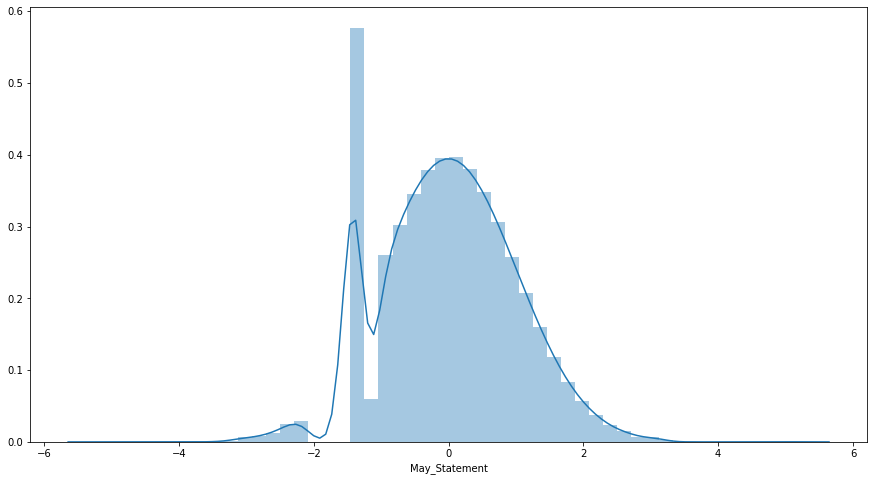

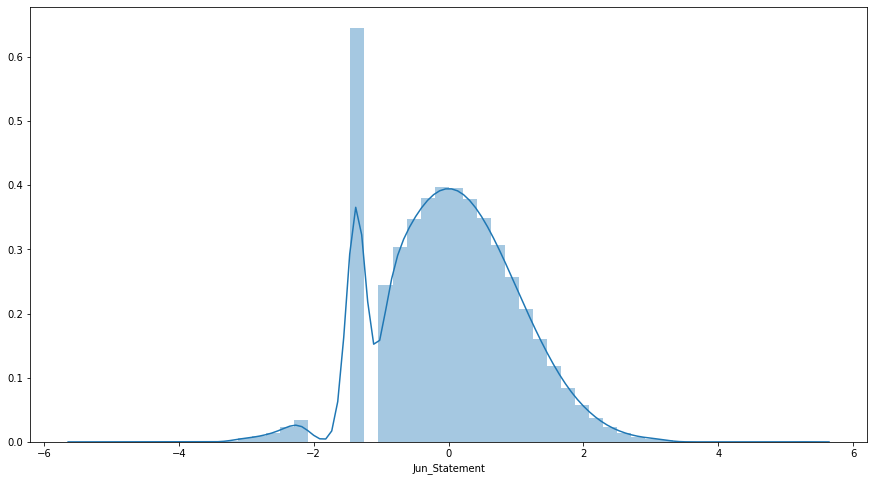

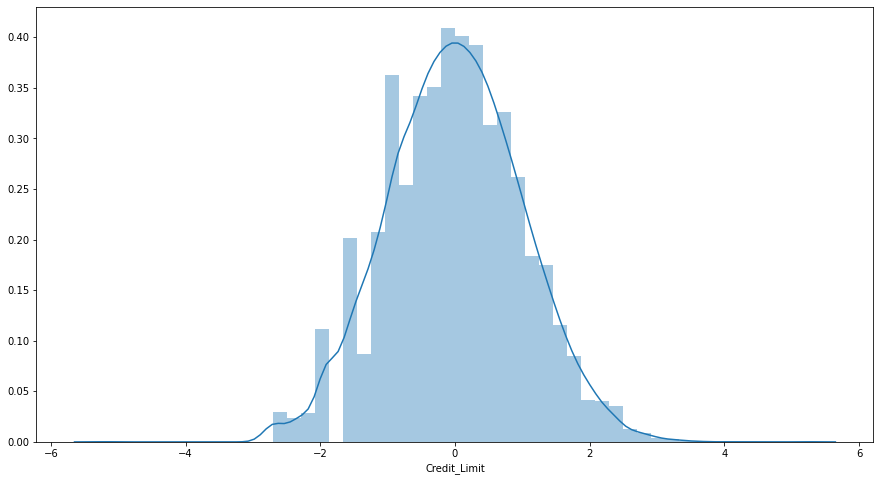

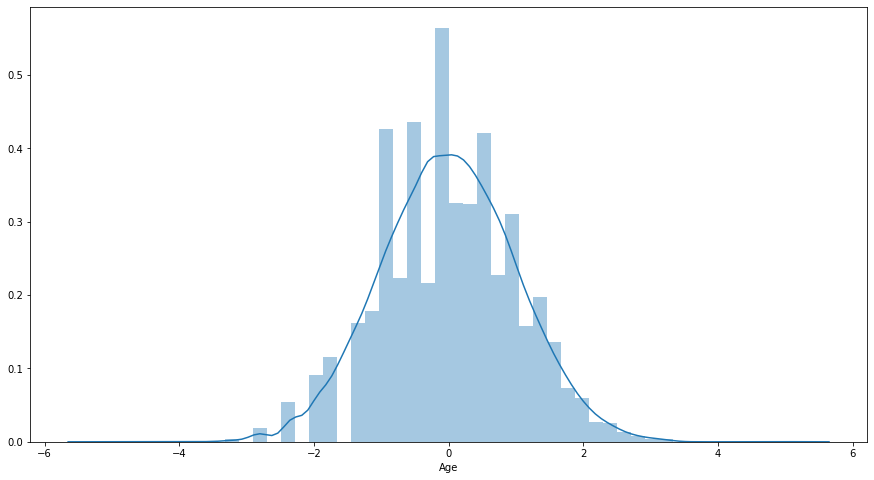

In [108]:
for b in M:
    X_train[b]=quantile_transformer.fit_transform(X_train[b].values.reshape(-1,1))
    plt.figure(figsize=(15,8))
    sns.distplot(X_train[b])

In [109]:
X_train.skew()

Credit_Limit                  0.022155
Sex                           0.425714
Education                    -0.256794
Marital_Status                0.189001
Age                           0.009275
Jan_Repay_Status              1.212161
Previous_Payment_Prior_Jan   -1.280680
Jan_Statement                 0.041122
Feb_Repay_Status              1.874198
Previous_Payment_Prior_Feb   -1.250606
Feb_Statement                 0.042967
Mar_Repay_Status              1.954486
Previous_Payment_Prior_Mar   -1.149954
Mar_Statement                 0.051074
Apr_Repay_Status              2.203283
Previous_Payment_Prior_Apr   -1.095535
Apr_Statement                 0.061350
May_Repay_Status              2.456259
Previous_Payment_Prior_May   -1.056000
May_Statement                 0.061697
Jun_Repay_Status              2.399331
Previous_Payment_Prior_Jun   -0.980214
Jun_Statement                 0.073255
dtype: float64

#### Dealing with Outliares

#### Replacing Outliers with L=Q25th-IQR*1.5 and U=Q75th+IQR*1.5

In [110]:
def outliers_iqr(data):
    Q25th=np.percentile(data,25)
    Q75th=np.percentile(data,75)
    IQR=Q75th-Q25th
    L=Q25th-IQR*1.5
    U=Q75th+IQR*1.5
    for a in data.values:
        if a<L:
            data.replace(a, L, inplace=True)
        if a>U:
            data.replace(a, U, inplace=True)
    return data

In [111]:
M=['Previous_Payment_Prior_Jan', 'Previous_Payment_Prior_Feb','Previous_Payment_Prior_Mar','Previous_Payment_Prior_Apr'
  ,'Previous_Payment_Prior_May','Previous_Payment_Prior_Jun','Jan_Statement','Feb_Statement','Mar_Statement','Apr_Statement'
  ,'May_Statement','Jun_Statement','Credit_Limit','Age']

In [112]:
for column in M:
    X_train[column]=outliers_iqr(X_train[column])

### Pre-Modeling Tasks

##### Feature Scaling

In [113]:
A=['Previous_Payment_Prior_Jan', 'Previous_Payment_Prior_Feb','Previous_Payment_Prior_Mar','Previous_Payment_Prior_Apr'
  ,'Previous_Payment_Prior_May','Previous_Payment_Prior_Jun','Credit_Limit','Jan_Statement','Feb_Statement','Mar_Statement','Apr_Statement','May_Statement','Jun_Statement','Age']

In [115]:
for  c in A:
    X_train[c]=MinMaxScaler(feature_range=(1, 2)).fit_transform(X_train[c].values.reshape(-1,1))
    X_test[c]=MinMaxScaler(feature_range=(1, 2)).fit_transform(X_test[c].values.reshape(-1,1))
    X_validate[c]=MinMaxScaler(feature_range=(1, 2)).fit_transform(X_validate[c].values.reshape(-1,1))

## Modeling

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(label, prediction, train=True):
    if train:
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
    elif train==False:
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

### 1. Convolutional Neural Network (CNNs)

In [117]:
X_train_d = np.expand_dims(X_train, -1)
X_test_d = np.expand_dims(X_test, -1)
X_validate_d = np.expand_dims(X_validate, -1)

In [118]:
print(f"TRAINING: X_train: {X_train_d.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate_d.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test_d.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (17125, 23, 1), y_train: (17125,)
_______________________________________________________
VALIDATION: X_validate: (4282, 23, 1), y_validate: (4282,)
__________________________________________________
TESTING: X_test: (9175, 23, 1), y_test: (9175,)


In [119]:
from tensorflow.keras.models import Sequential

In [120]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [121]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train_d[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

In [122]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 22, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 22, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 22, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 21, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 20, 128)           1

In [123]:

model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=[tensorflow.keras.metrics.AUC()])
r = model.fit(X_train_d, y_train, 
              validation_data=(X_validate_d, y_validate),
              batch_size=500, 
              epochs=epochs)

Train on 17125 samples, validate on 4282 samples
Epoch 1/20
17125/17125 [==============================] - 18s 1ms/sample - loss: 0.6902 - auc: 0.6411 - val_loss: 0.7630 - val_auc: 0.6772
Epoch 2/20
17125/17125 [==============================] - 13s 763us/sample - loss: 0.5859 - auc: 0.6716 - val_loss: 0.8332 - val_auc: 0.6927
Epoch 3/20
17125/17125 [==============================] - 13s 740us/sample - loss: 0.5404 - auc: 0.6877 - val_loss: 0.8703 - val_auc: 0.7110
Epoch 4/20
17125/17125 [==============================] - 12s 695us/sample - loss: 0.5102 - auc: 0.6992 - val_loss: 0.8696 - val_auc: 0.7203
Epoch 5/20
17125/17125 [==============================] - 12s 698us/sample - loss: 0.5010 - auc: 0.7054 - val_loss: 0.8895 - val_auc: 0.7249
Epoch 6/20
17125/17125 [==============================] - 13s 730us/sample - loss: 0.4897 - auc: 0.7115 - val_loss: 0.8838 - val_auc: 0.7259
Epoch 7/20
17125/17125 [==============================] - 13s 743us/sample - loss: 0.4838 - auc: 0.7156 - v

In [124]:
score = model.evaluate(X_test_d, y_test)

9175/9175 [==============================] - 2s 249us/sample - loss: 0.5314 - auc: 0.7396


In [125]:
print(score)

[0.5314023674671267, 0.739589]


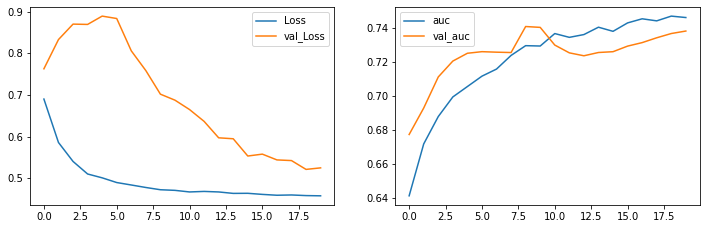

In [126]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['auc'], label='auc')
plt.plot(r.history['val_auc'], label='val_auc')
plt.legend()

In [127]:
y_train_pred = model.predict(X_train_d)
y_test_pred = model.predict(X_test_d)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

Train Result:
Accuracy Score: 80.41%
_______________________________________________
Classification Report:	Precision Score: 62.73%
			Recall Score: 30.55%
			F1 score: 41.09%
_______________________________________________
Confusion Matrix: 
 [[12600   695]
 [ 2660  1170]]

Test Result:
Accuracy Score: 79.76%
_______________________________________________
Classification Report:	Precision Score: 62.99%
			Recall Score: 26.82%
			F1 score: 37.62%
_______________________________________________
Confusion Matrix: 
 [[6758  329]
 [1528  560]]



In [128]:
print(classification_report(y_test, y_test_pred.round()))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      7087
         1.0       0.63      0.27      0.38      2088

    accuracy                           0.80      9175
   macro avg       0.72      0.61      0.63      9175
weighted avg       0.77      0.80      0.76      9175



### Adding Maxpoling

In [129]:
epochs = 30
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train_d[0].shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# weights = {0:1, 1:5}
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=[tensorflow.keras.metrics.AUC()])
r = model.fit(X_train_d, y_train, 
              validation_data=(X_validate_d, y_validate),
              batch_size=50, 
              epochs=epochs, 
#               class_weight=weights
             )

Train on 17125 samples, validate on 4282 samples
Epoch 1/30
17125/17125 [==============================] - 8s 496us/sample - loss: 0.6614 - auc_1: 0.6175 - val_loss: 1.2447 - val_auc_1: 0.6746
Epoch 2/30
17125/17125 [==============================] - 4s 246us/sample - loss: 0.5970 - auc_1: 0.6471 - val_loss: 0.6226 - val_auc_1: 0.7152
Epoch 3/30
17125/17125 [==============================] - 5s 263us/sample - loss: 0.5638 - auc_1: 0.6631 - val_loss: 0.5066 - val_auc_1: 0.7205
Epoch 4/30
17125/17125 [==============================] - 4s 241us/sample - loss: 0.5452 - auc_1: 0.6698 - val_loss: 0.5394 - val_auc_1: 0.7297
Epoch 5/30
17125/17125 [==============================] - 4s 217us/sample - loss: 0.5221 - auc_1: 0.6856 - val_loss: 0.5249 - val_auc_1: 0.7300
Epoch 6/30
17125/17125 [==============================] - 4s 232us/sample - loss: 0.5152 - auc_1: 0.6896 - val_loss: 0.5177 - val_auc_1: 0.7216
Epoch 7/30
17125/17125 [==============================] - 5s 278us/sample - loss: 0.504

In [130]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 22, 32)            96        
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 32)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 11, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 64)            4160      
_________________________________________________________________
batch_normalization_4 (Batch (None, 10, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 64)            

In [131]:
score = model.evaluate(X_test_d, y_test)
print(score)

9175/9175 [==============================] - 1s 136us/sample - loss: 0.5367 - auc_1: 0.7494
[0.5367395711464843, 0.74942935]


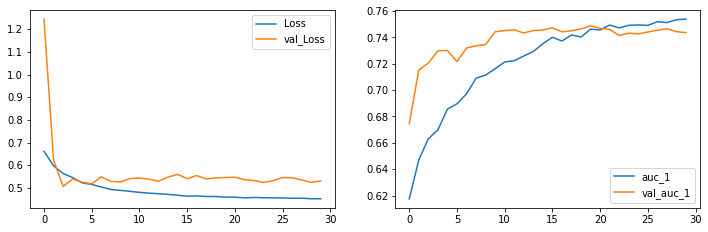

In [132]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['auc_1'], label='auc_1')
plt.plot(r.history['val_auc_1'], label='val_auc_1')
plt.legend()

In [133]:
y_train_pred = model.predict(X_train_d)
y_test_pred = model.predict(X_test_d)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

Train Result:
Accuracy Score: 80.82%
_______________________________________________
Classification Report:	Precision Score: 59.39%
			Recall Score: 45.01%
			F1 score: 51.21%
_______________________________________________
Confusion Matrix: 
 [[12116  1179]
 [ 2106  1724]]

Test Result:
Accuracy Score: 79.44%
_______________________________________________
Classification Report:	Precision Score: 56.82%
			Recall Score: 40.28%
			F1 score: 47.14%
_______________________________________________
Confusion Matrix: 
 [[6448  639]
 [1247  841]]



In [134]:
print(classification_report(y_test, y_test_pred.round()))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      7087
         1.0       0.57      0.40      0.47      2088

    accuracy                           0.79      9175
   macro avg       0.70      0.66      0.67      9175
weighted avg       0.78      0.79      0.78      9175



### Model Building (Downsampling the majority class)

In [135]:
from sklearn.preprocessing import StandardScaler

In [205]:
X=df.drop('July_Payment_Status',axis=1)
y=df['July_Payment_Status']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


df_1 = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
df_1.head()

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,Feb_Statement,Mar_Repay_Status,Previous_Payment_Prior_Mar,Mar_Statement,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
9726,12800.0,0.212,0.195,0.215,31.0,0.157,178.0,476.0,0.169,136.0,176.0,0.168,44.0,134.0,0.173,3297.0,44.0,0.177,0.0,3297.0,0.188,836.0,3293.0,0.0
7203,1900.0,0.245,0.195,0.215,25.0,0.129,280.0,1200.0,0.159,17.0,1430.0,0.519,120.0,1377.0,0.183,120.0,1234.0,0.189,120.0,1097.0,0.188,120.0,969.0,0.0
19432,2100.0,0.212,0.235,0.236,39.0,0.500,153.0,681.0,0.549,80.0,822.0,0.519,24.0,877.0,0.527,0.0,833.0,0.544,25.0,811.0,0.188,28.0,753.0,1.0
19673,9600.0,0.212,0.195,0.215,24.0,0.500,0.0,0.0,0.169,0.0,0.0,0.168,0.0,0.0,0.173,0.0,0.0,0.177,0.0,0.0,0.184,0.0,0.0,1.0
26681,3100.0,0.245,0.235,0.236,41.0,0.157,180.0,17.0,0.169,60.0,180.0,0.175,100.0,213.0,0.183,40.0,285.0,0.189,20.0,304.0,0.188,40.0,302.0,0.0


In [206]:
from sklearn.utils import resample

minority_class = df_1[df_1['July_Payment_Status'] == 1]
majority_class = df_1[df_1['July_Payment_Status'] == 0]

majority_downsample = resample(majority_class, replace=False, 
                               n_samples=minority_class.shape[0], 
                               random_state=42)

df_2 = pd.concat([majority_downsample, minority_class])


In [207]:
scaler = StandardScaler()

X2=df_2.drop('July_Payment_Status',axis=1)
y2=df_2['July_Payment_Status']



X_train, X_validate, y_train, y_validate = train_test_split(X2, y2, test_size=0.3, random_state=42)



In [208]:
for b in M:
    X_train[b]=quantile_transformer.fit_transform(X_train[b].values.reshape(-1,1))
    

In [209]:
for column in M:
    X_train[column]=outliers_iqr(X_train[column])

In [210]:
for  c in A:
    X_train[c]=MinMaxScaler(feature_range=(1, 2)).fit_transform(X_train[c].values.reshape(-1,1))
    X_test[c]=MinMaxScaler(feature_range=(1, 2)).fit_transform(X_test[c].values.reshape(-1,1))
    X_validate[c]=MinMaxScaler(feature_range=(1, 2)).fit_transform(X_validate[c].values.reshape(-1,1))

In [211]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_validate = np.expand_dims(X_validate, -1)

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)
print(X_test.shape)
print(y_test.shape)

(6708, 23, 1)
(6708,)
(2876, 23, 1)
(2876,)
(9175, 23, 1)
(9175,)


In [212]:
epochs = 70
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))



model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))
# weights = {0:1, 1:5}
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=[tensorflow.keras.metrics.AUC()])
r = model.fit(X_train, y_train, 
              validation_data=(X_validate, y_validate),
              batch_size=50, 
              epochs=epochs, 
#               class_weight=weights
             )

Train on 6708 samples, validate on 2876 samples
Epoch 1/70
6708/6708 [==============================] - 6s 957us/sample - loss: 0.7568 - auc_8: 0.6892 - val_loss: 0.7736 - val_auc_8: 0.7553
Epoch 2/70
6708/6708 [==============================] - 5s 732us/sample - loss: 0.6174 - auc_8: 0.7226 - val_loss: 0.8285 - val_auc_8: 0.7185
Epoch 3/70
6708/6708 [==============================] - 5s 749us/sample - loss: 0.6037 - auc_8: 0.7344 - val_loss: 0.7441 - val_auc_8: 0.7221
Epoch 4/70
6708/6708 [==============================] - 5s 682us/sample - loss: 0.6002 - auc_8: 0.7415 - val_loss: 0.6970 - val_auc_8: 0.7322
Epoch 5/70
6708/6708 [==============================] - 5s 751us/sample - loss: 0.5932 - auc_8: 0.7469 - val_loss: 0.6696 - val_auc_8: 0.7383
Epoch 6/70
6708/6708 [==============================] - 5s 775us/sample - loss: 0.5938 - auc_8: 0.7476 - val_loss: 0.6432 - val_auc_8: 0.7565
Epoch 7/70
6708/6708 [==============================] - 5s 726us/sample - loss: 0.5913 - auc_8: 0.75

6708/6708 [==============================] - 5s 810us/sample - loss: 0.5730 - auc_8: 0.7730 - val_loss: 0.6355 - val_auc_8: 0.7552
Epoch 59/70
6708/6708 [==============================] - 5s 797us/sample - loss: 0.5658 - auc_8: 0.7787 - val_loss: 0.6189 - val_auc_8: 0.7417
Epoch 60/70
6708/6708 [==============================] - 5s 810us/sample - loss: 0.5735 - auc_8: 0.7708 - val_loss: 0.6316 - val_auc_8: 0.7580
Epoch 61/70
6708/6708 [==============================] - 5s 796us/sample - loss: 0.5649 - auc_8: 0.7790 - val_loss: 0.6044 - val_auc_8: 0.7403
Epoch 62/70
6708/6708 [==============================] - 5s 810us/sample - loss: 0.5681 - auc_8: 0.7781 - val_loss: 0.6266 - val_auc_8: 0.7504
Epoch 63/70
6708/6708 [==============================] - 6s 829us/sample - loss: 0.5659 - auc_8: 0.7771 - val_loss: 0.6138 - val_auc_8: 0.7401
Epoch 64/70
6708/6708 [==============================] - 5s 794us/sample - loss: 0.5634 - auc_8: 0.7792 - val_loss: 0.6197 - val_auc_8: 0.7535
Epoch 65/70

In [213]:
score = model.evaluate(X_test, y_test)
print(score)

9175/9175 [==============================] - 2s 216us/sample - loss: 0.6806 - auc_8: 0.7317
[0.6805939100353854, 0.7316828]


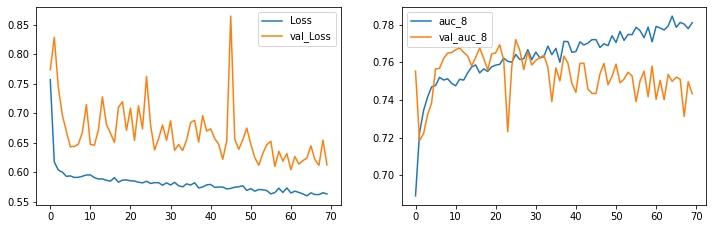

In [214]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['auc_8'], label='auc_8')
plt.plot(r.history['val_auc_8'], label='val_auc_8')
plt.legend()

In [215]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

Train Result:
Accuracy Score: 72.33%
_______________________________________________
Classification Report:	Precision Score: 80.29%
			Recall Score: 59.30%
			F1 score: 68.22%
_______________________________________________
Confusion Matrix: 
 [[2860  489]
 [1367 1992]]

Test Result:
Accuracy Score: 74.55%
_______________________________________________
Classification Report:	Precision Score: 45.61%
			Recall Score: 61.45%
			F1 score: 52.36%
_______________________________________________
Confusion Matrix: 
 [[5557 1530]
 [ 805 1283]]



In [216]:
print(classification_report(y_test, y_test_pred.round()))

              precision    recall  f1-score   support

         0.0       0.87      0.78      0.83      7087
         1.0       0.46      0.61      0.52      2088

    accuracy                           0.75      9175
   macro avg       0.66      0.70      0.67      9175
weighted avg       0.78      0.75      0.76      9175

